# EDA CASE STUDY - GROUP CASE STUDY
#### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

In [1]:
# # Importing the required libraries 6523

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Displaying the 150 columns and rows

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

##  Reading the Application Data
'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

In [4]:
# reading the CSV file using pandas 'read_csv' method and storing it in app_data dataframe
# also diplaying the first 5 rows 

app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Inspecting the Dataframe
Checking the Dataframe dimension, null values,summary of the dataframe  

In [5]:
# Checking the number of rows and columns in the dataframe

app_data.shape

(307511, 122)

In [6]:
# Checking the column-wise info of the dataframe for the first 60 columns

app_data.iloc[:,:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
# Checking the column-wise info of the dataframe for the remaining columns

app_data.iloc[:,59:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   BASEMENTAREA_MODE             127568 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  157504 non-null  float64
 2   YEARS_BUILD_MODE              103023 non-null  float64
 3   COMMONAREA_MODE               92646 non-null   float64
 4   ELEVATORS_MODE                143620 non-null  float64
 5   ENTRANCES_MODE                152683 non-null  float64
 6   FLOORSMAX_MODE                154491 non-null  float64
 7   FLOORSMIN_MODE                98869 non-null   float64
 8   LANDAREA_MODE                 124921 non-null  float64
 9   LIVINGAPARTMENTS_MODE         97312 non-null   float64
 10  LIVINGAREA_MODE               153161 non-null  float64
 11  NONLIVINGAPARTMENTS_MODE      93997 non-null   float64
 12  NONLIVINGAREA_MODE            137829 non-nul

In [8]:
# Checking the summary for the numeric columns 

app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
app_data.describe(include = 'all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

## Handling Null values and Outlies
now we have inspected the dataframe, let's start checking the missing values and missing value treatment 

as you can see, many columns have the missing values and those values needs to be checked and treated as per the requirement

In [10]:
#checking the number of missing values in the dataset and sorting the values 

app_data.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [11]:
app_data.shape[0]

307511

In [12]:
# checking the percentage of missing values in each column,  total missing values from each column / number of total rows 

((app_data.isnull().sum()/app_data.shape[0])*100).sort_values()

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

#### Generally we drop columns containg null values 50% or more but the columns till 47% doesnt seems any inferences can be drwan, Droping the columns containing 47% and more percentage of missing values, bcz almost half of the data is missing.      Inferences drawn from such column will be very much biased and it will only be applicable for half of the dataset
if you see, dropping columns are more related to the customer's living house details which won't much describe the 
TARGET varible and it will not effect the final result

In [13]:
# Storing the column names in a list wrt percentage of missing values containing each column as per the obove output

column_names = list(((app_data.isnull().sum()/app_data.shape[0])*100).sort_values().index)

In [14]:
# checking the index number of 'EMERGENCYSTATE_MODE' column, which has 47% null values from there the columns will be dropped

column_names.index('EMERGENCYSTATE_MODE')

73

In [15]:
# slicing the list from columns from 'EMERGENCYSTATE_MODE' to 'COMMONAREA_MEDI' 

drop_cols = column_names[73:]

In [16]:
# number of columns to be dropped are 49 from the main data frame

len(drop_cols)

49

In [17]:
# this sliced list contains the column name containg the null values 47% and more

drop_cols

['EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'HOUSETYPE_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_1',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'OWN_CAR_AGE',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'COMMON

In [18]:
# dropping the columns from 'EMERGENCYSTATE_MODE' to 'COMMONAREA_MEDI' at axis = 1

app_data = app_data.drop(drop_cols,axis=1)

In [19]:
# shape of the data frame after droping the above columns

app_data.shape

(307511, 73)

#### I see the columns have same percentile of missing values till the sixth decimal value                                                                                           
- AMT_REQ_CREDIT_BUREAU_QRT    ---  13.501631
- AMT_REQ_CREDIT_BUREAU_HOUR   --- 13.501631
- AMT_REQ_CREDIT_BUREAU_DAY    --- 13.501631
- AMT_REQ_CREDIT_BUREAU_WEEK   ---  13.501631
- AMT_REQ_CREDIT_BUREAU_MON    ---  13.501631
- AMT_REQ_CREDIT_BUREAU_YEAR   ---  13.501631

let's check weather these columns are have any impact on the TARGET varible

In [20]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [21]:
# Summary of the columns 'AMT_REQ_CREDIT_BUREAU_HOUR' - AMT_REQ_CREDIT_BUREAU_DAY more than 75% of the values are 0,
# only some rows contains values.

app_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

#### There is no good correlation between plotted feature and TARGET  fearture it is good to drop these columns from the data frame

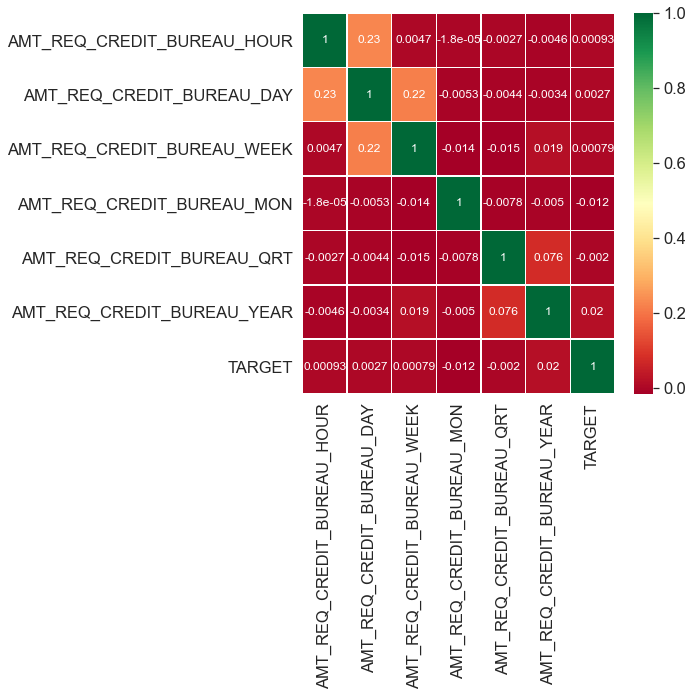

In [22]:
# plotting the heatmap(sns.heatmap()) to to check the correlation(.corr()) between the above columns and the target variable 

plt.figure(figsize=(7,7))

sns.set(font_scale=1.5)
enquiries_target_cols = list(app_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].columns) + ['TARGET']

sns.heatmap(app_data[enquiries_target_cols].corr(), annot=True, cmap='RdYlGn',annot_kws={'size': 12,'color':'white'},
                                                                              linewidths=0.5, linecolor='white'   )

plt.show()

In [23]:
# dropping the the columns 'AMT_REQ_CREDIT_BUREAU_HOUR' - 'AMT_REQ_CREDIT_BUREAU_YEAR'

app_data = app_data.drop(enquiries_target_cols[:-1], axis=1)

####  The columns have the below percentage of null values and before doing any further anlysis lets check the impact of these columns on the TARGET  
- 'EXT_SOURCE_1'- 56.38% - column deleted previously as it had  more than 50% of the data
- 'EXT_SOURCE_2'-19.8%,
- 'EXT_SOURCE_3' < 1%
####  column 'EXT_SOURCE_1' deleted previously as it had  more than 50% of the data the heatmap plotted for 'EXT_SOURCE_2' and 'EXT_SOURCE_3'

### Insights
The columns 'EXT_SOURCE_2','EXT_SOURCE_3' have no linear correlation with the target variable its better to drop thsess columns
as no information can be drawn from these columns

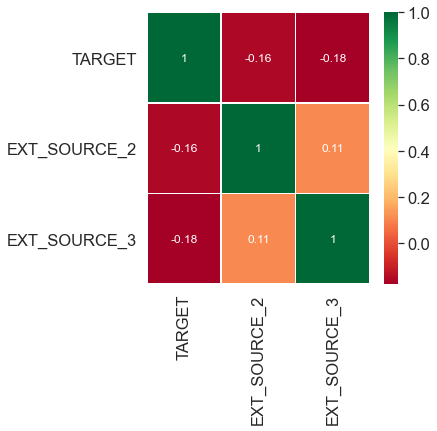

In [24]:
# heatmap(sns.heatmap) is plotted on correlation matrix(.corr()) 

plt.figure(figsize=(5,5))

sns.set(font_scale=1.5)
sources = ['TARGET','EXT_SOURCE_2','EXT_SOURCE_3']
sns.heatmap(app_data[sources].corr(), annot=True, cmap='RdYlGn',annot_kws={'size': 12,'color':'white'},
                                         linewidths=0.5, linecolor='white'   )

plt.show()

In [25]:
# dropping the columns 'EXT_SOURCE_2','EXT_SOURCE_3' with df.drop() function

drop_sources = ['EXT_SOURCE_2','EXT_SOURCE_3']
app_data = app_data.drop(drop_sources,axis=1)

In [26]:
# there are still 65 columns are present in the dataset

app_data.shape

(307511, 65)

#### The columns from 'FLAG_DOCUMENT_2' to 'FLAG_DOCUMENT_21' contains,information in flags weather the borrower provided the respective documents or not. lets see wether the respective documents submitted by the borrower will be able repay or not 
lets check the linear relationship betweent the columns and weather the borrower submitted the respective documents

In [27]:
# fisrt five rows of the FLAG_DOCUMENTS columns

app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                1                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0                 0  
1                 0                 0                 0                 0  
2                 0                 0                 0                 0  
3                 0                 0                 0                 0  
4                 0                 0                 0                 0

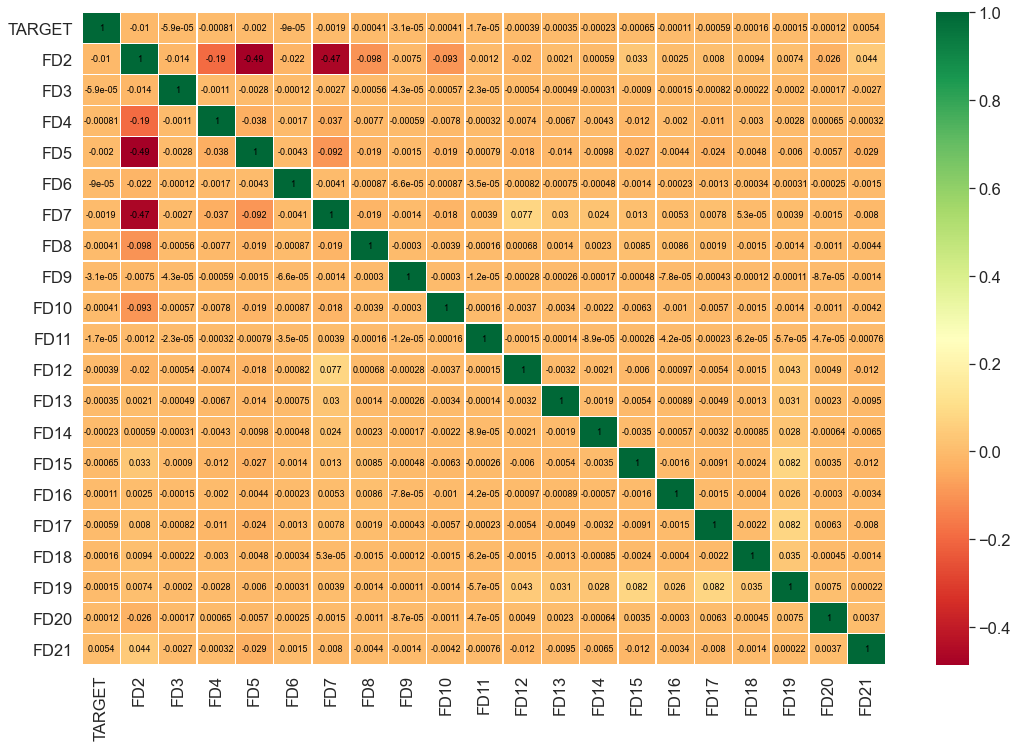

In [28]:
# checking the correlation between the FLAD_DOCUMENTS and TARGET

plt.figure(figsize=(18,12))

flag_documents_target = list( app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'] ) + ['TARGET']


tick_labels = ['TARGET','FD2','FD3','FD4','FD5','FD6','FD7',
             'FD8','FD9','FD10','FD11','FD12','FD13',
             'FD14','FD15','FD16','FD17','FD18','FD19',
             'FD20','FD21']


sns.heatmap(app_data[flag_documents_target].corr(), annot=True, cmap='RdYlGn',annot_kws={'size':9,'color':'black'},
                                    linewidths=0.5, linecolor='white',  xticklabels= tick_labels,yticklabels= tick_labels)
plt.show()

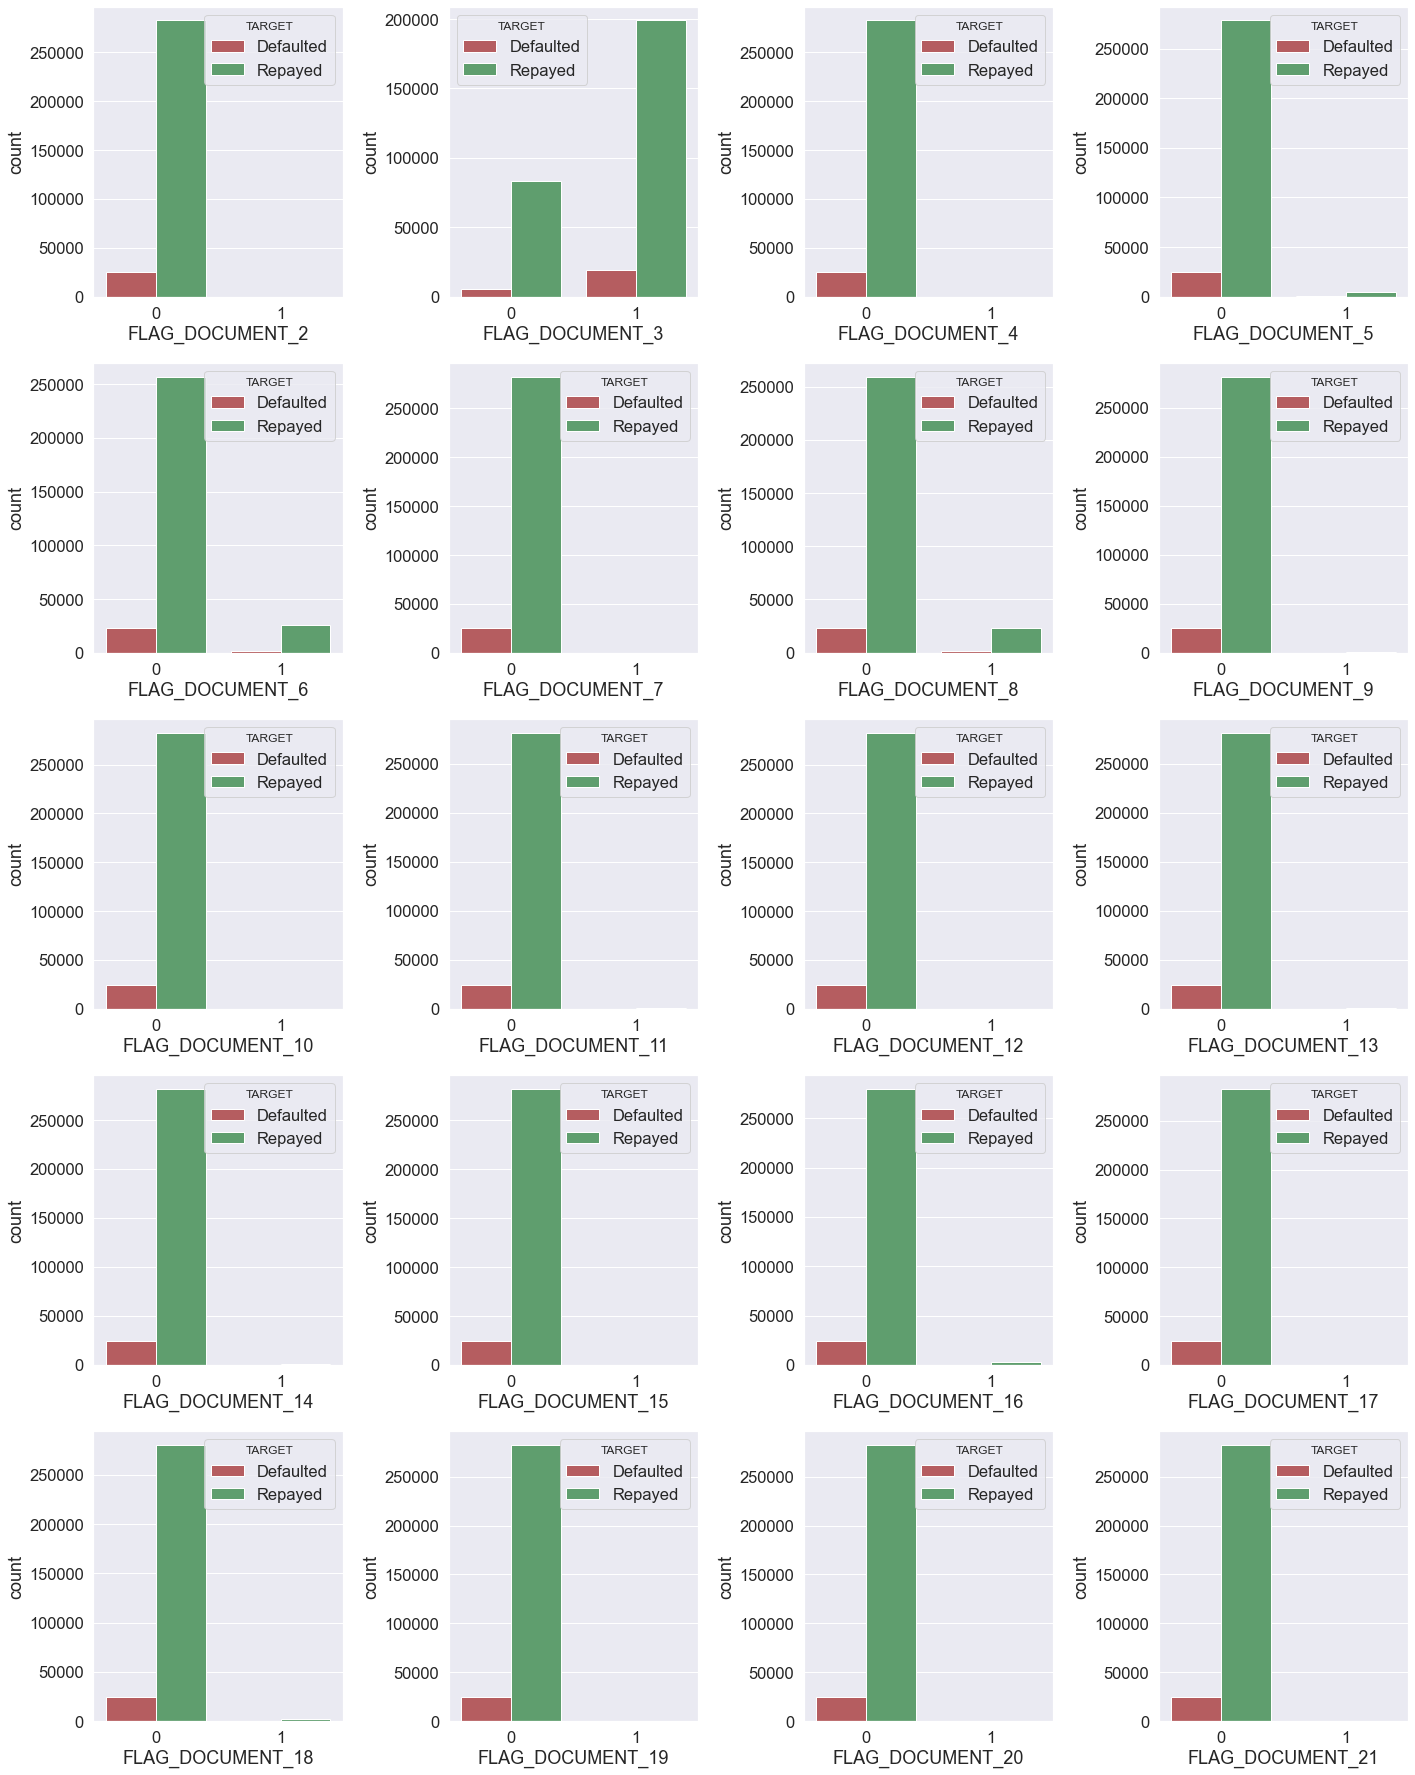

In [29]:
# taking the subset of 'FLAG_DOCUMENT_2' and TATGET and pltting the barplot for each document wrt TARGET

submit_doc = app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
submit_doc['TARGET'] = app_data['TARGET']

submit_doc['TARGET'] = submit_doc['TARGET'].apply(lambda x: 'Repayed' if x==0 else 'Defaulted')

plt.figure(figsize=(20,25))
j = 0
for i in submit_doc.columns[:-1]:
    j = j + 1
    plt.subplot(5,4,j)
    sns.countplot(submit_doc[i], hue=submit_doc['TARGET'], palette=['r','g'])

plt.tight_layout()

In [30]:
# Dropping the columns from FLAG_DOCUMENT2 to FLAG_DOCUMENT21

drop_doc = list(submit_doc.columns)[:-1]

app_data = app_data.drop(drop_doc,axis=1)

#### INSIGTS:
- There is very less correlation between the FLAG_DOCUMENT columns and TARGET 
- most of the documents are not submitted except fot FLAG_DOCUMENT3
- Only FLAG_DOCUMENT3 borrower has submitted the documents and defaulter can be predicted 

In [31]:
# There are still 45 columns are present in the dataset

app_data.shape

(307511, 45)

#### The columns FLAG_MOBIL  to FLAG_EMAIL contains the contacting details of the borrower.contains,information in flags weather the borrower provided the respective details or not. lets see wether the respective documents submitted by the borrower will be able repay or not 

In [32]:
app_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  
0           0  
1           0  
2           0  
3           0  
4           0

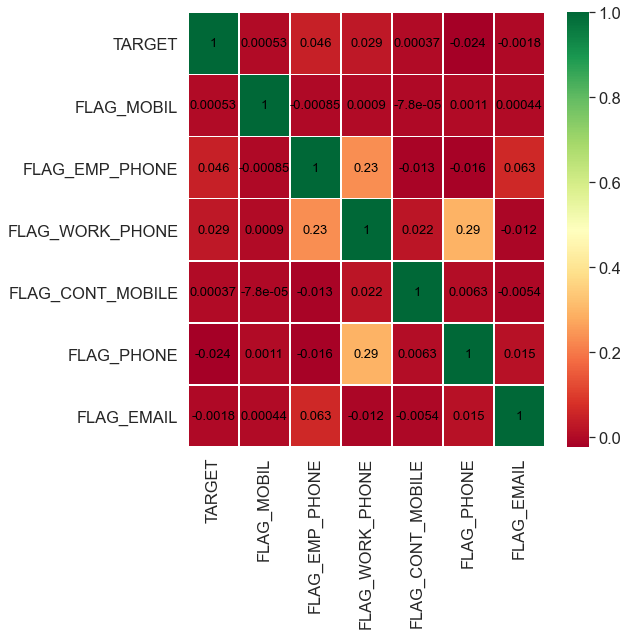

In [33]:
# checking the correlation between the FLAG_MOBIL' and TARGET

plt.figure(figsize=(8,8))

flag_contact = ['TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

sns.heatmap(app_data[flag_contact].corr(), annot=True, cmap='RdYlGn',annot_kws={'size':13,'color':'black'},
                                                                        linewidths=0.5, linecolor='white')
plt.show()

In [34]:
app_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  
0           0  
1           0  
2           0  
3           0  
4           0

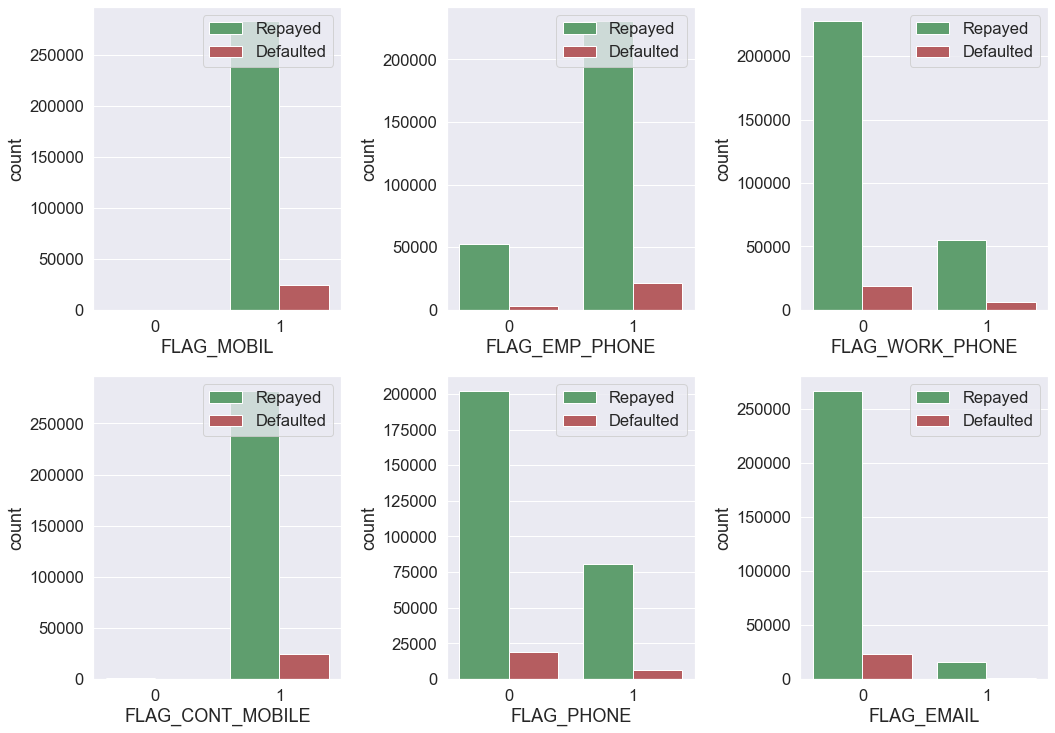

In [35]:
# pltting the barplot for each conatting details wrt TARGET

plt.figure(figsize=(15,15))
j = 0
for i in app_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].columns:
    j = j + 1
    plt.subplot(3,3,j)
    sns.countplot(app_data[i], hue=app_data['TARGET'], palette=['g','r'],)
    plt.legend(['Repayed','Defaulted'])

plt.tight_layout()

#### INSIGTS:
-There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [36]:
# dropping the columns from FLAG_MOBIl to FLAG_EMAIL columns

drop_contact = app_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].columns
app_data = app_data.drop(drop_contact, axis=1)

#### These columns are in the negative values which represents the number of days from the day of application 
- These column needs to be converted into years
- The column values needs to converted in bins as per the requirement

In [37]:
# checking the column values

app_data[ ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [38]:
# converting the negative days into the years

days_year = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for day in days_year:
    app_data[day] = abs(app_data[day]) // 365
    
app_data[days_year].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean       43.435968     185.021521          13.168683         7.713474   
std        11.954593     381.972190           9.646841         4.134515   
min        20.000000       0.000000           0.000000         0.000000   
25%        34.000000       2.000000           5.000000         4.000000   
50%        43.000000       6.000000          12.000000         8.000000   
75%        53.000000      15.000000          20.000000        11.000000   
max        69.000000    1000.000000          67.000000        19.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean                 2.225115  
std                  2.193678  
min                  0.000000  
25%                  0.000000  
50%                  2.000000  
75%                  4.000000  
max                 11.000000

In [39]:
# converted values for the columns from negative to positive years

app_data[ ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean       43.435968     185.021521          13.168683         7.713474   
std        11.954593     381.972190           9.646841         4.134515   
min        20.000000       0.000000           0.000000         0.000000   
25%        34.000000       2.000000           5.000000         4.000000   
50%        43.000000       6.000000          12.000000         8.000000   
75%        53.000000      15.000000          20.000000        11.000000   
max        69.000000    1000.000000          67.000000        19.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean                 2.225115  
std                  2.193678  
min                  0.000000  
25%                  0.000000  
50%                  2.000000  
75%                  4.000000  
max                 11.000000

In [40]:
# making bins for 'DAYS_BIRTH' for seperate age groups 

app_data['DAYS_BIRTH_grp'] = pd.cut(app_data['DAYS_BIRTH'],[0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])
app_data['DAYS_BIRTH_grp']

0           <30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506      <30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: DAYS_BIRTH_grp, Length: 307511, dtype: category
Categories (5, object): [<30 < 30-40 < 40-50 < 50-60 < 60+]

In [41]:
# there are some extream values 1000 years in 'DAYS_EMPLOYED'

app_data['DAYS_EMPLOYED'].quantile([0.5,0.75,0.8,0.81,0.8199,0.82,0.85,0.90,1])

0.5000       6.0
0.7500      15.0
0.8000      25.0
0.8100      29.0
0.8199      46.0
0.8200    1000.0
0.8500    1000.0
0.9000    1000.0
1.0000    1000.0
Name: DAYS_EMPLOYED, dtype: float64

In [42]:
# checking the second least value in the column which look promising with the actual data

app_data[app_data['DAYS_EMPLOYED'] < 1000]['DAYS_EMPLOYED'].max()

49

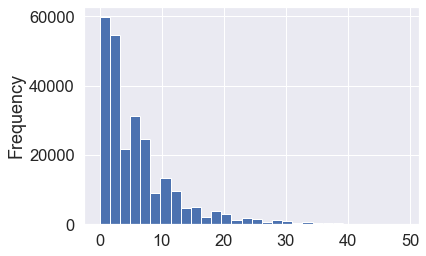

In [43]:
# plotting for real values as the distribution is right scewed the median() is best option to replace with 

app_data[app_data['DAYS_EMPLOYED'] < 1000]['DAYS_EMPLOYED'].plot.hist(bins=30)

In [44]:
# the median values look good for replasing this extream values

employed_median = app_data[app_data['DAYS_EMPLOYED'] < 1000]['DAYS_EMPLOYED'].median()
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: x if(x < 50) else employed_median)

app_data['DAYS_EMPLOYED'].describe()

count    307511.00000
mean          5.67020
std           5.86224
min           0.00000
25%           2.00000
50%           4.00000
75%           7.00000
max          49.00000
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
# making bins for 'DAYS_EMPLOYED' column, for seperate employed years 

app_data['DAYS_EMPLOYED_grp'] = pd.cut(app_data['DAYS_EMPLOYED'],[-1,6,11,21,31,41,999], 
                                                labels=['0-5','6-10','11-20','21-30','31-40','40+'])
app_data['DAYS_EMPLOYED_grp']

0           0-5
1           0-5
2           0-5
3          6-10
4          6-10
          ...  
307506      0-5
307507      0-5
307508    11-20
307509    11-20
307510      0-5
Name: DAYS_EMPLOYED_grp, Length: 307511, dtype: category
Categories (6, object): [0-5 < 6-10 < 11-20 < 21-30 < 31-40 < 40+]

#### This is an important column to check which domain people are defaulting the loan,
- This column contains 31.34% of missing values which cannot be replaced with any other values from the dataset
- Replacing the missing values as 'Unkown' in 'OCCUPATION_TYPE' column

In [46]:
# replasing the missing with unkown

app_data['OCCUPATION_TYPE'].fillna('Unkown',inplace=True)
app_data['OCCUPATION_TYPE'].value_counts(normalize=True) * 100

Unkown                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

# DATA ANALYSIS

The Dataset is imbalanced with 91.9% and 8.1% percentage 
- Repayers - 91.9 %
- Defaulters - 8.1 %

In [47]:
# checking the percentage of Repayers and Defaulters

app_data['TARGET'].value_counts(normalize=True) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [48]:
# count of each target category

def count_percentage(column):
    
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=column, data=app_data)
    plt.title(column +' %')
    plt.xticks(rotation=90)
    plt.xlabel(column)
          
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/app_data.shape[0]*100)), (p.get_x()+0.1,(p.get_height()+50)))

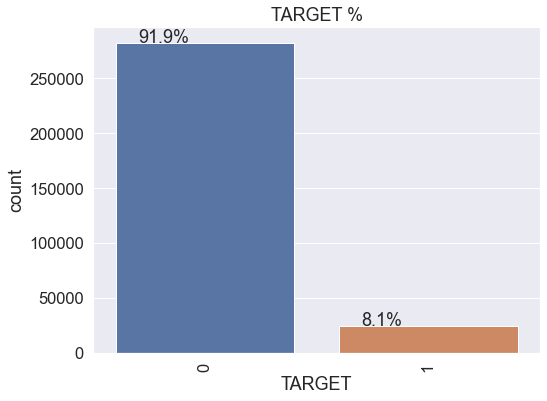

In [49]:
count_percentage('TARGET')

In [50]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            1.0                9.0   
1                    0.003541          45            3.0                3.0   
2                    0.010032          52            0.0               11.0   
3                    0.008019          52            8.0               26.0   
4                    0.028663          54            8.0               11.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                5        Laborers              1.0                     2   
1                0      Core staff              2.0                     1   
2                6        Laborers              1.0                     2   
3                6        Laborers              2.0                     2   
4                9      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [51]:
# Summary of numeric columns 'AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT'

app_data[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL    AMT_ANNUITY    AMT_CREDIT  AMT_GOODS_PRICE
count      3.075110e+05  307499.000000  3.075110e+05     3.072330e+05
mean       1.687979e+05   27108.573909  5.990260e+05     5.383962e+05
std        2.371231e+05   14493.737315  4.024908e+05     3.694465e+05
min        2.565000e+04    1615.500000  4.500000e+04     4.050000e+04
25%        1.125000e+05   16524.000000  2.700000e+05     2.385000e+05
50%        1.471500e+05   24903.000000  5.135310e+05     4.500000e+05
75%        2.025000e+05   34596.000000  8.086500e+05     6.795000e+05
max        1.170000e+08  258025.500000  4.050000e+06     4.050000e+06

#### Summary of the columns shows presence of outlies in all the three columns lets check 

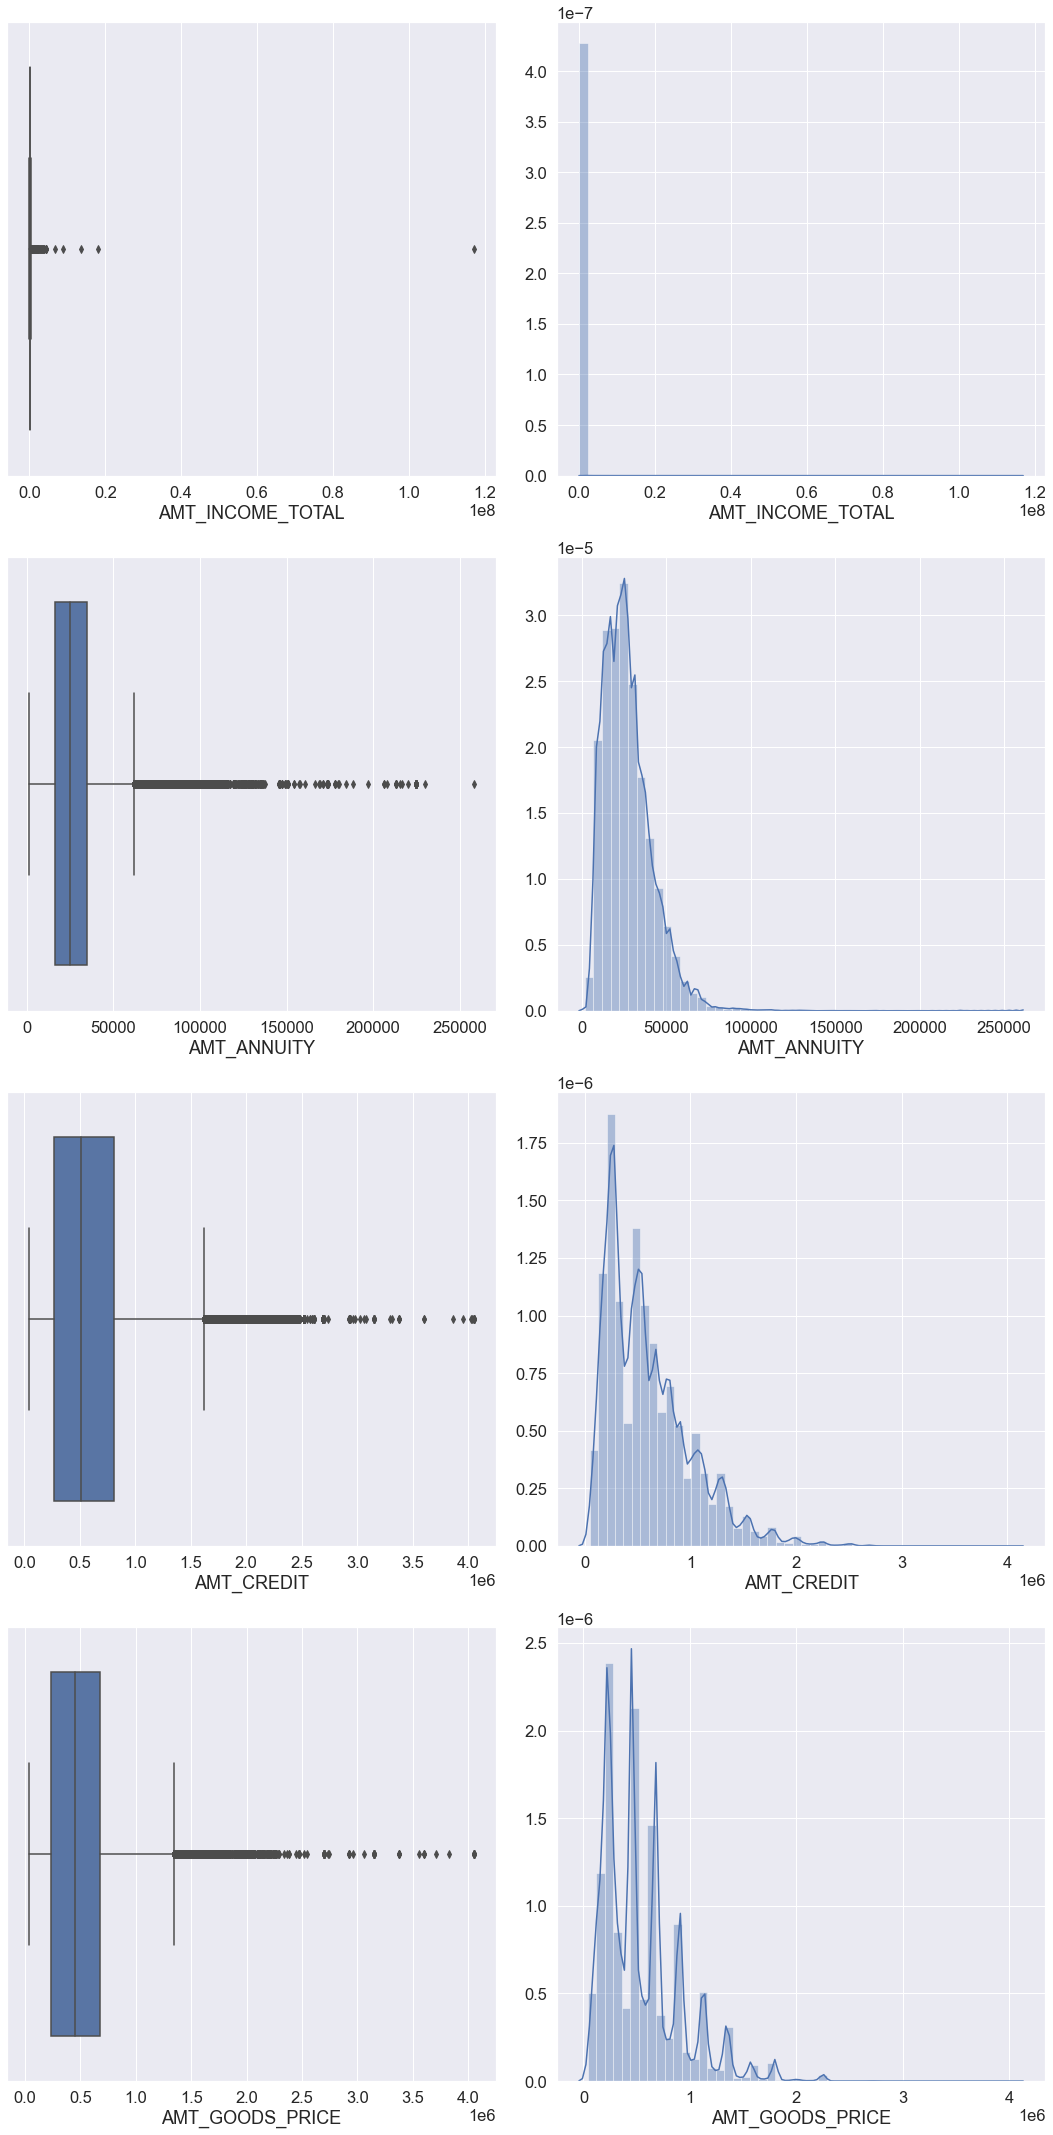

In [52]:
amount_columns = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']

plt.figure(figsize=(15,30))
j = 0
for i in amount_columns:
    j += 1
    plt.subplot(len(amount_columns),2,j)
    sns.boxplot(app_data[i])
    j +=1
    
    plt.subplot(len(amount_columns),2,j)
    sns.distplot(app_data[i])

plt.tight_layout()
plt.show()

#### Insight:
There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [53]:
# as these column conatins the outlies lets check after slicing the data at defferent percentages
# the values starts incereasing more and more after 95% percenatge

app_data[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT']].quantile([0.25,0.5,0.75,0.9,0.93,0.95,0.98,1])

AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_CREDIT
0.25          112500.0      16524.0    270000.0
0.50          147150.0      24903.0    513531.0
0.75          202500.0      34596.0    808650.0
0.90          270000.0      45954.0   1133748.0
0.93          315000.0      49878.0   1288350.0
0.95          337500.0      53325.0   1350000.0
0.98          427500.0      62964.0   1661418.0
1.00       117000000.0     258025.5   4050000.0

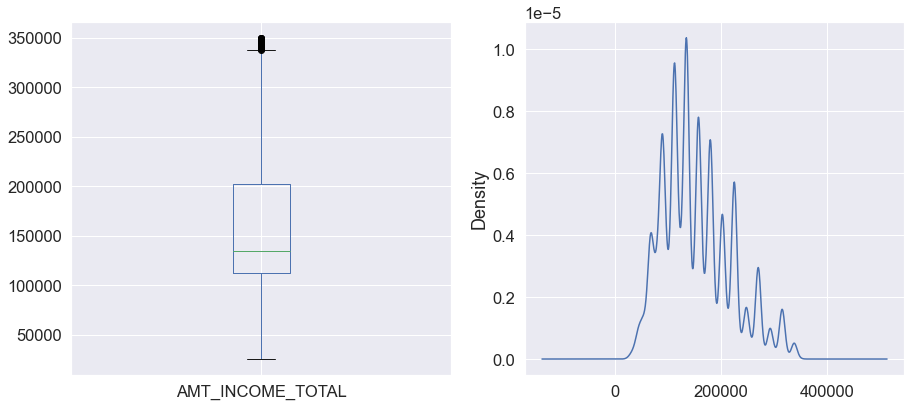

In [54]:
# plotting after negating the heigher values 

plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
app_data[app_data['AMT_INCOME_TOTAL'] < 350000.0]['AMT_INCOME_TOTAL'].plot.box()

plt.subplot(1,2,2)
app_data[app_data['AMT_INCOME_TOTAL'] < 350000.0]['AMT_INCOME_TOTAL'].plot.kde()

plt.tight_layout()
plt.show()



#### INSIGHTS :
- almost all values fits in the box plot whith least outliers in the plot.
- there are many rise and fall in the kde plot the mean look to follow almost normal distribution

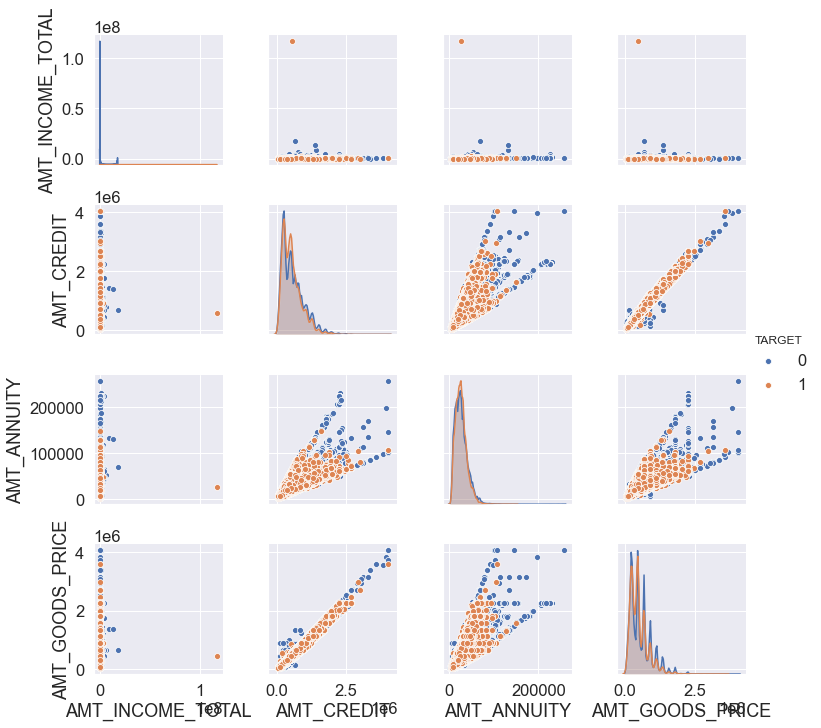

In [55]:
# Pairplot() for amount columns - TARGER as hue 

sns.pairplot(app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']], hue='TARGET')
plt.show()

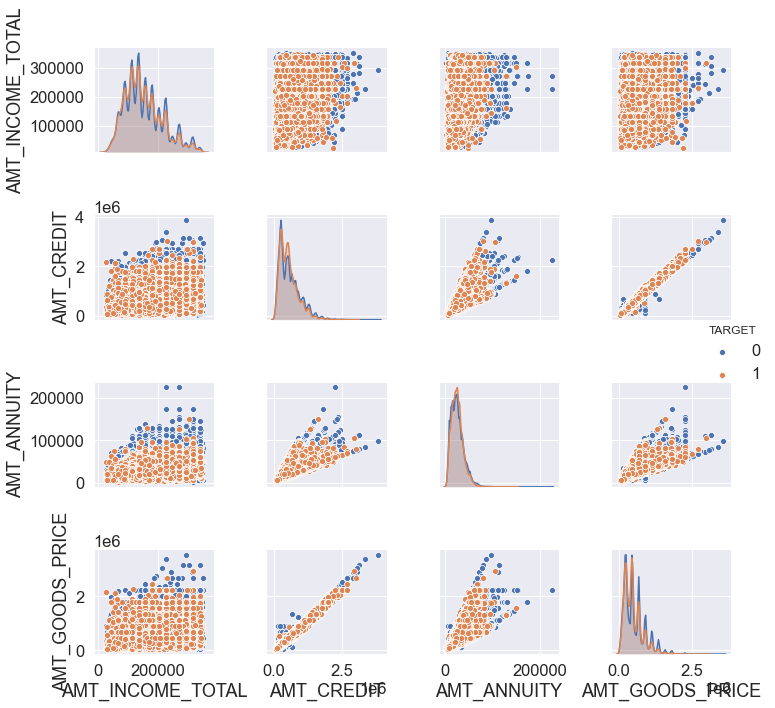

In [56]:
# plotting 'AMT_INCOME_TOTAL' < 3,50,000 

low_value = app_data[app_data['AMT_INCOME_TOTAL']<350000]
sns.pairplot(low_value[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']],hue='TARGET')
plt.tight_layout()

#### INSIGHTS:
- 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' column contains lots of outliers
- 'AMT_CREDIT' has high correlation with 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'
-  high amount borrower are least likely to default

In [57]:
app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].quantile([0,0.1,0.25,0.4,0.5,0.6,0.75,0.9,0.95,1])

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
0.00           25650.0     45000.0       1615.5          40500.0
0.10           81000.0    180000.0      11074.5         180000.0
0.25          112500.0    270000.0      16524.0         238500.0
0.40          135000.0    432000.0      21865.5         373500.0
0.50          147150.0    513531.0      24903.0         450000.0
0.60          162000.0    604152.0      28062.0         522000.0
0.75          202500.0    808650.0      34596.0         679500.0
0.90          270000.0   1133748.0      45954.0        1093500.0
0.95          337500.0   1350000.0      53325.0        1305000.0
1.00       117000000.0   4050000.0     258025.5        4050000.0

### This Function is used for plotting the countplot for categorical variable and barplot for same categorical grouped feature wrt Target column.
to determine the percentage of each categorical feature inside the column and percentage of defaulting for each category

In [58]:
def compare_defaulting(column,xname):
    
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=app_data)
    plt.title(xname+' %')
    plt.xticks(rotation=90)
    plt.xlabel(xname)
          
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/app_data.shape[0]*100)), (p.get_x()+0.1,(p.get_height()+50)))
    
    
    
    plt.subplot(1,2,2)
    grouped = app_data.groupby(column).mean()['TARGET']
    axe = sns.barplot(grouped.index,grouped)
    plt.xticks(rotation=90)
    plt.title(xname+'-'+'Defaulting %')
    plt.xlabel(xname)
    plt.ylabel('')
    
    for p in axe.patches:
        axe.annotate('{:.1f}%'.format((p.get_height()*100)), (p.get_x()+0.1,(p.get_height())))
        
    plt.tight_layout()
    plt.show()
        
        

In [59]:
# To draw the countplot with hue as Taget

def count_percentage_target(column,xname):
    
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=column, data=app_data,hue='TARGET')
    plt.title(xname+' %')
    plt.xticks(rotation=90)
    plt.xlabel(xname)
    plt.legend(['Repayed','Defaulted'])
                
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/app_data.shape[0]*100)), (p.get_x()+0.1,(p.get_height()+50)))

### making the bins for range of values to get better undestanding, in which range of values borrowers are defaulting the loan

In [60]:
# making bins with as per data distribution and common way of understanding '0-50k','50k-100k','100k-150k','150k-200k',
#'200K-300K','300k-400k','400k-1M','1M+'

app_data['AMT_INCOME_TOTAL_grp'] = pd.cut(app_data['AMT_INCOME_TOTAL'],
                                            bins=[0,50000,100000,150000,200000,300000,400000,1000000,1000000000],
                                            labels=['0-50k','50k-100k','100k-150k','150k-200k','200K-300K','300k-400k','400k-1M','1M+'])

In [61]:
# number of values in each bin

app_data['AMT_INCOME_TOTAL_grp'].value_counts(normalize=True) * 100

100k-150k    29.784626
200K-300K    21.194689
150k-200k    20.912097
50k-100k     19.245165
300k-400k     4.772512
400k-1M       2.540722
0-50k         1.468891
1M+           0.081298
Name: AMT_INCOME_TOTAL_grp, dtype: float64

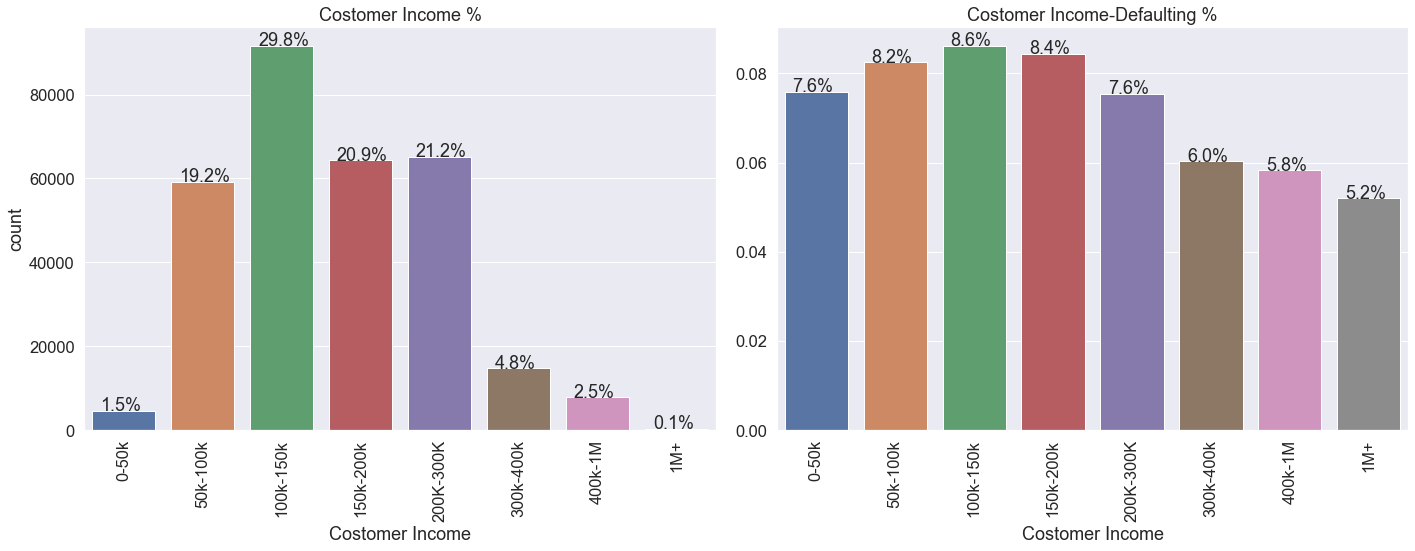

In [62]:
# bar plot for value percentage in each bin and the chances of borrower defaulting the loan from each bin 

compare_defaulting('AMT_INCOME_TOTAL_grp', 'Costomer Income')

In [63]:
# making bins with as per data distribution and common way of understanding 
# '0-100k','100k-200k','200k-300k','300K-400K','400k-500k','500k-750k','750K-1M','1M-1.5M','1.5M-2M','2M-3M','3M+


label_name = ['0-100k','100k-200k','200k-300k','300K-400K','400k-500k','500k-750k','750K-1M','1M-1.5M',
                                                                   '1.5M-2M','2M-2.5','2.5+']
bin_values = [0,100000,200000,300000,400000,500000,750000,1000000,1500000,2000000,2500000,100000000000]

app_data['AMT_CREDIT_grp'] = pd.cut(app_data['AMT_CREDIT'],
                                            bins=bin_values,labels=label_name)

In [64]:
# number of values in each bin

app_data['AMT_CREDIT_grp'].value_counts()

500k-750k    65094
200k-300k    54813
750K-1M      43099
1M-1.5M      39229
400k-500k    32038
100k-200k    30140
300K-400K    26338
1.5M-2M       8727
0-100k        6004
2M-2.5        1668
2.5+           361
Name: AMT_CREDIT_grp, dtype: int64

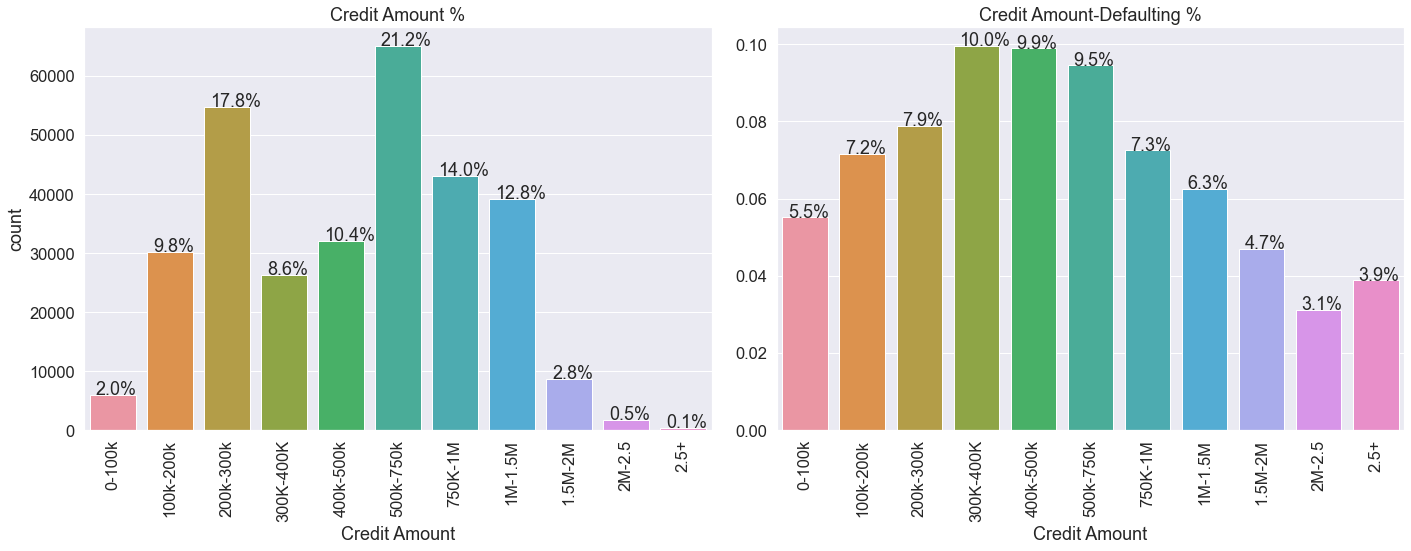

In [65]:
# bar plot for value percentage in each bin and the chances of borrower defaulting the loan from each bin 

compare_defaulting('AMT_CREDIT_grp', 'Credit Amount')

In [66]:
# making bins with as per data distribution and common way of understanding 

label_name = ['0-5k','5k-10k','10k-15k','15k-20k','20K-25K','25k-30k','30k-35k','35k-40','40K-50k','50-75k',
                                                                   '75k-100k','100k+']

bin_values = [0,5000,10000,15000,20000,25000,30000,35000,40000,50000,75000,100000,100000000]

app_data['AMT_ANNUITY_grp'] = pd.cut(app_data['AMT_ANNUITY'],
                                            bins=bin_values,labels=label_name)

In [67]:
# number of values in each bin

app_data['AMT_ANNUITY_grp'].value_counts()

20K-25K     48362
25k-30k     44104
15k-20k     42825
10k-15k     40397
30k-35k     33668
40K-50k     28669
35k-40      24894
5k-10k      22142
50-75k      19321
75k-100k     1471
0-5k         1141
100k+         505
Name: AMT_ANNUITY_grp, dtype: int64

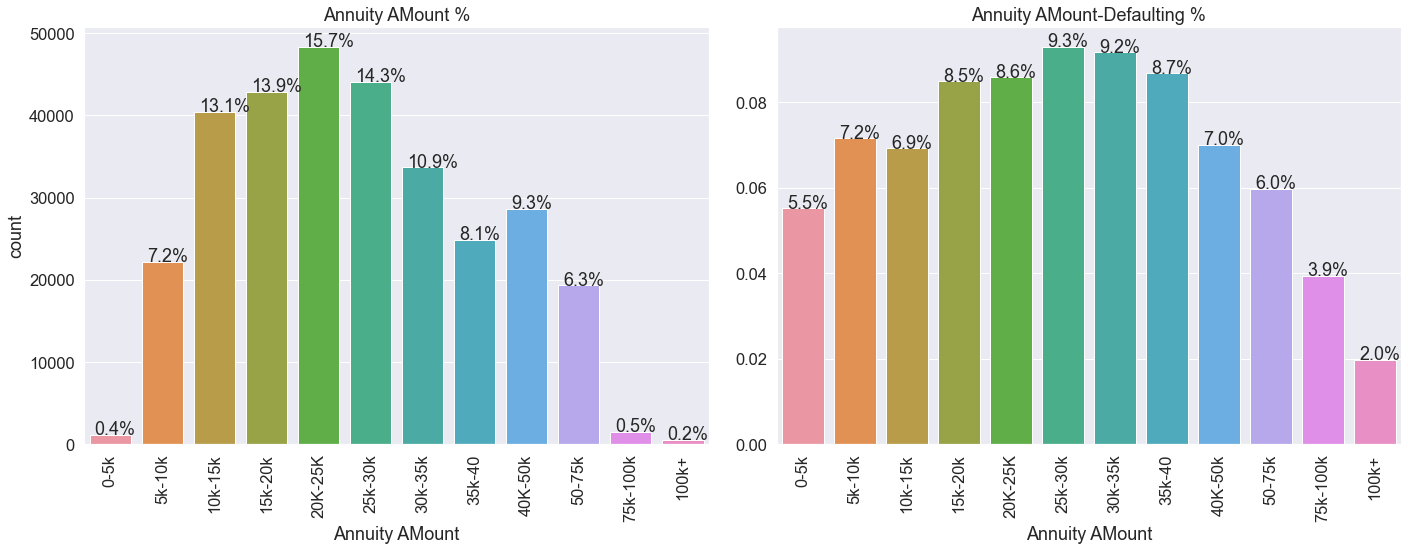

In [68]:
# bar plot for value percentage in each bin and the chances of borrower defaulting the loan from each bin 

compare_defaulting('AMT_ANNUITY_grp', 'Annuity AMount')

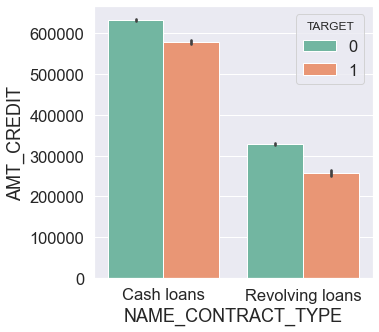

In [69]:
# barplot() between the 'NAME_CONTRACT_TYPE', 'AMT_CREDIT' and TARGET as hue

plt.figure(figsize=(5,5))
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data=app_data,hue='TARGET',palette="Set2")
plt.show()

#### INSIGHTS:
- AMT_INCOME_TOTAL- most people have the income in between 100k-150k and chences of borrower for this income are more.
- 'AMT_CREDIT -  most people have taken loan in between 500k-750k and chences of defaulting slightly lower than 300k-400k-500k.
- AMT_ANNUITY - most people have annuity 20-25k
- NAME_CONTRACT_TYPE - have almost same chances of defaulting for both the category 

In [70]:
app_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [71]:
# children column has values till 19, putting three and above in one bin

app_data['CNT_CHILDREN_grp'] = app_data['CNT_CHILDREN'].apply(lambda x: x if (x < 3) else '3 and 3+')
app_data['CNT_CHILDREN_grp']

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN_grp, Length: 307511, dtype: object

In [72]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [73]:
# as the XNA values are very less replacing it with the mode of the column

mode_gender = app_data['CODE_GENDER'].mode()[0]
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].apply(lambda x: mode_gender if x == 'XNA' else x)
                                                        

In [74]:


app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

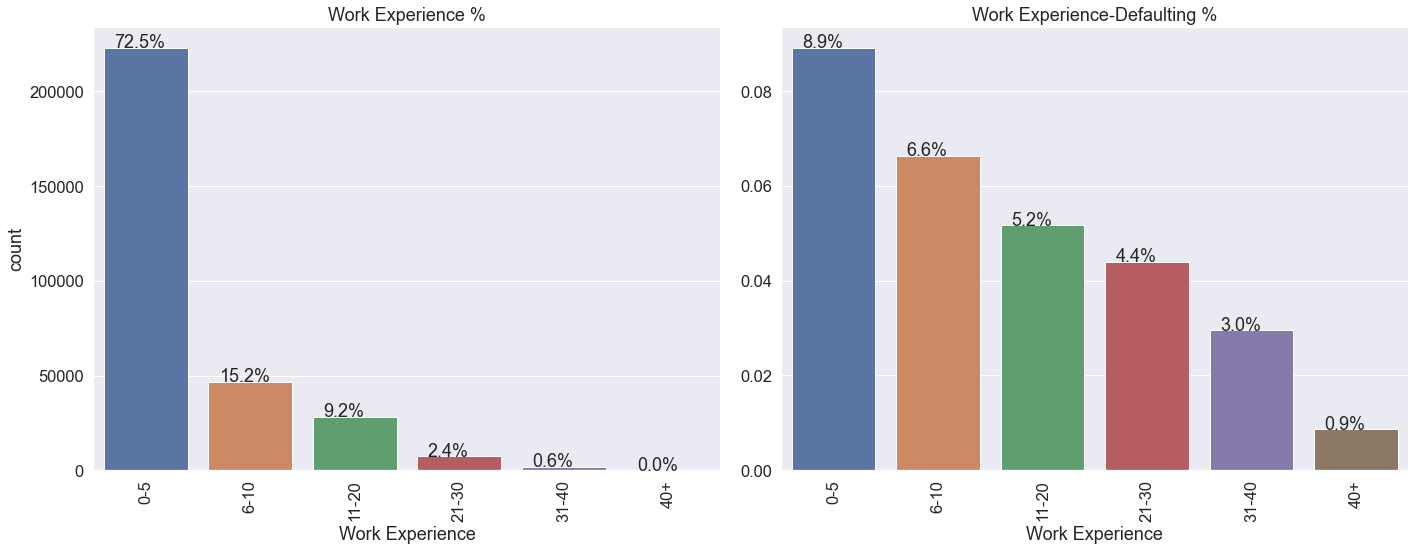

In [75]:
# borrowers work experience comparison.

compare_defaulting('DAYS_EMPLOYED_grp', 'Work Experience')

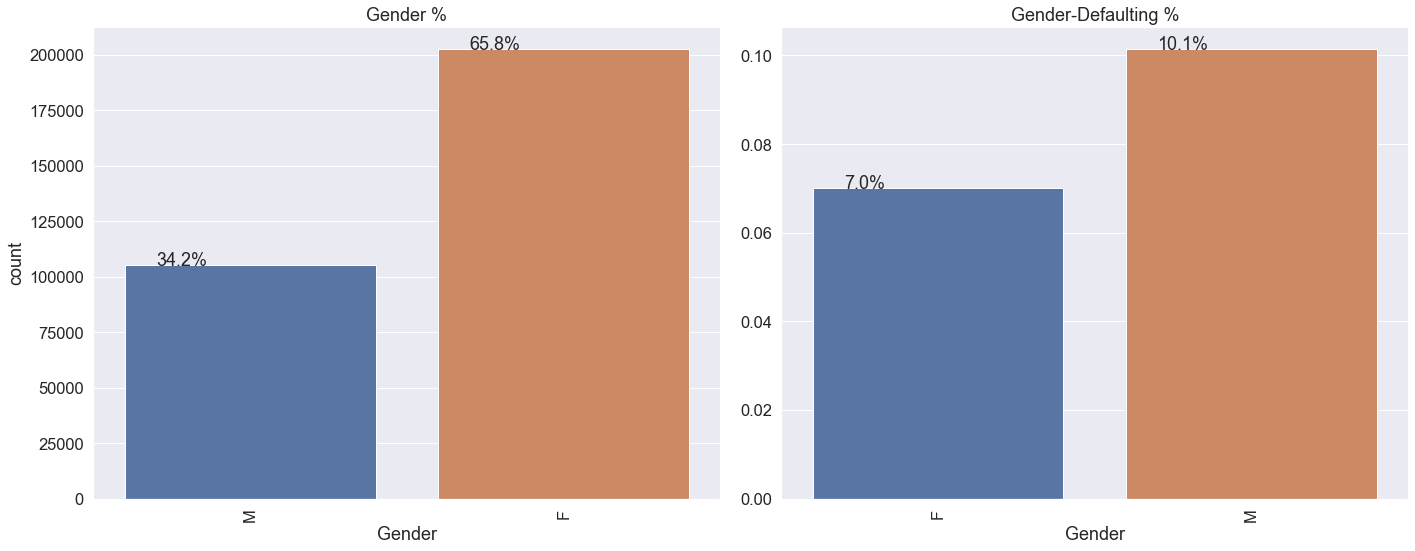

In [76]:
# borrower's gender comaprison

compare_defaulting('CODE_GENDER', 'Gender')

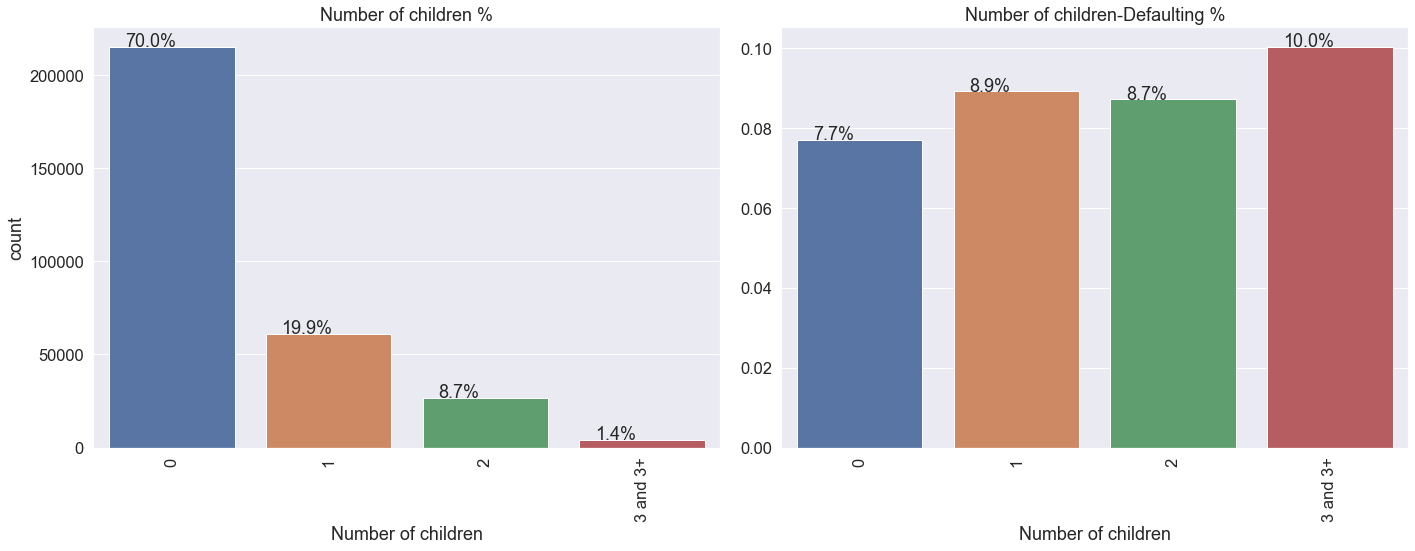

In [77]:
# comparison for number of cheldren borrower has.

compare_defaulting('CNT_CHILDREN_grp','Number of children')

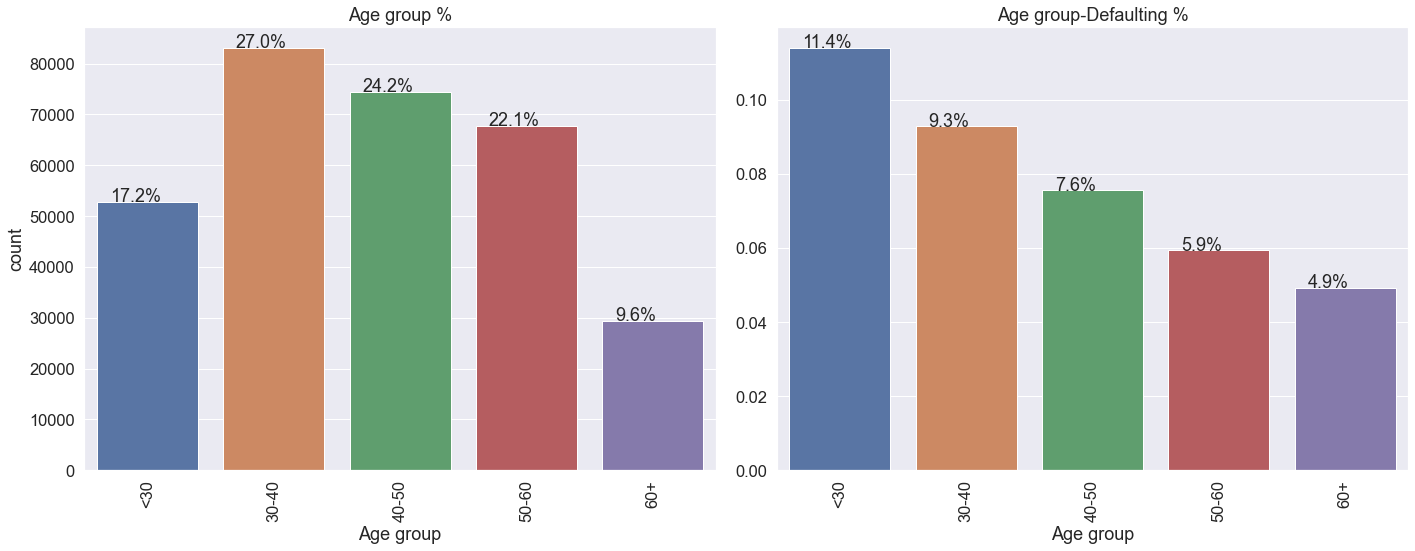

In [78]:
# the comparison for different age groups.

compare_defaulting('DAYS_BIRTH_grp', 'Age group')

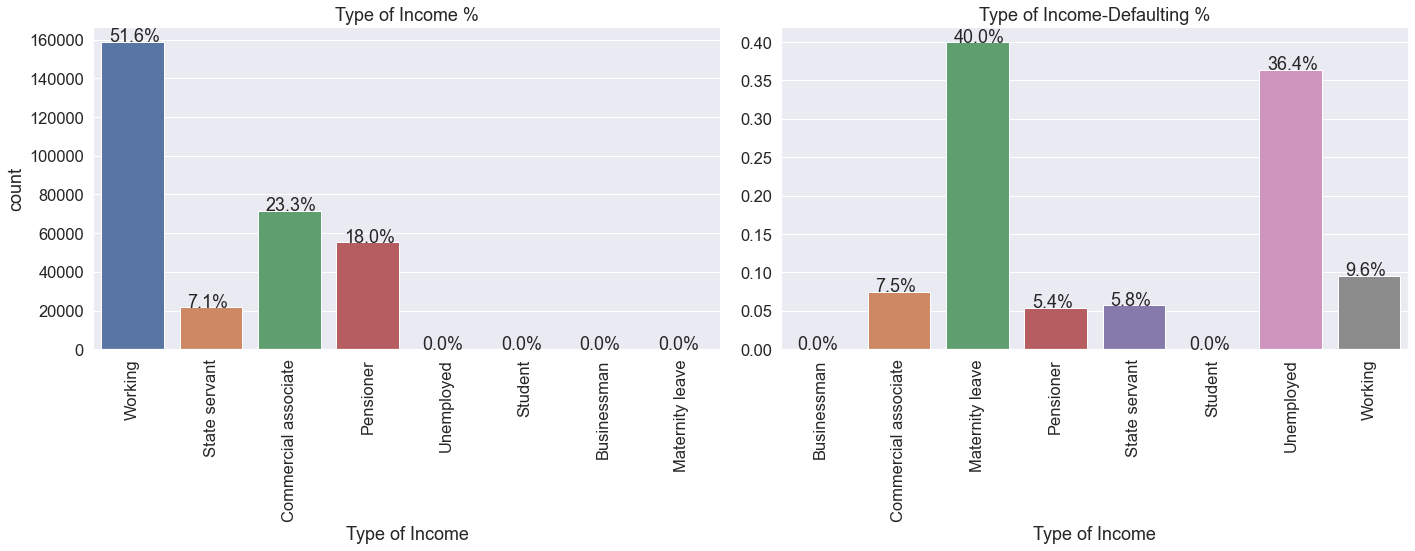

In [79]:
# borrowers percentage Income type comparison and defaulter income type comparison.


compare_defaulting('NAME_INCOME_TYPE', 'Type of Income')


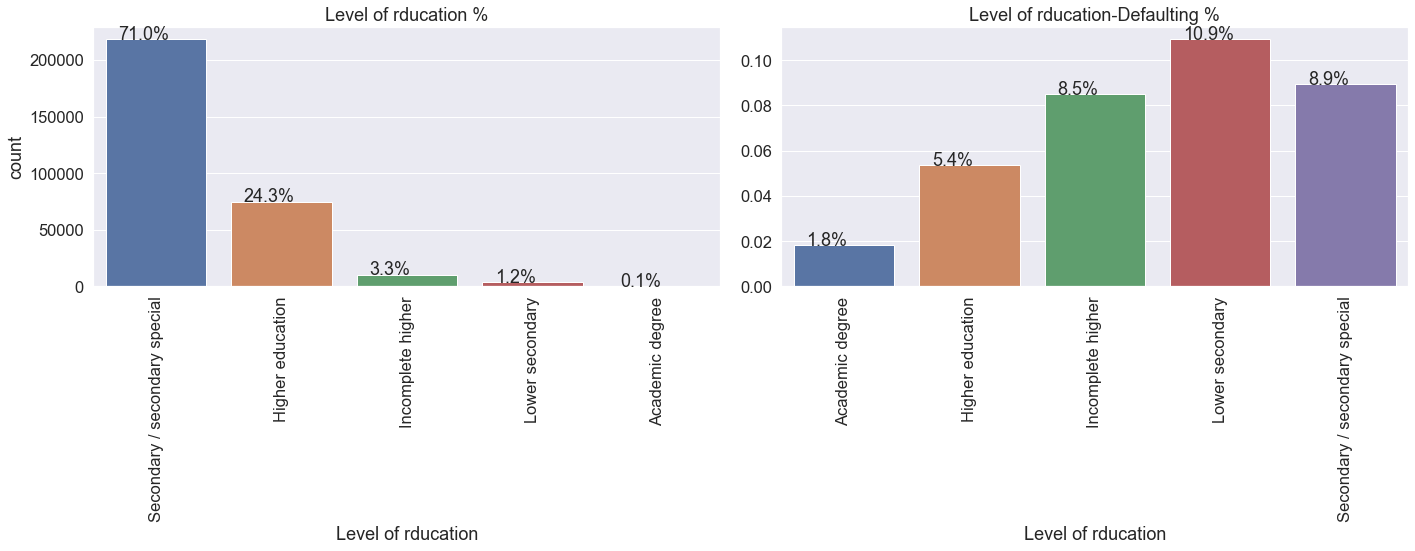

In [80]:
# comparison between the education type and percentage of person defaulting from perticular education.

compare_defaulting('NAME_EDUCATION_TYPE','Level of rducation')

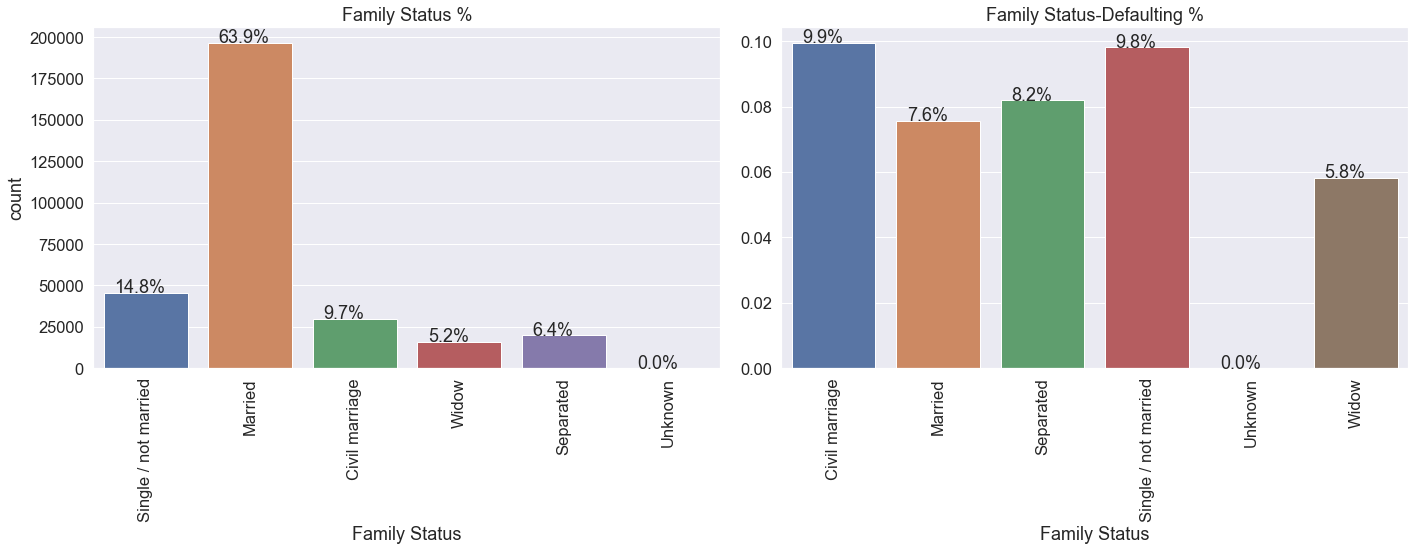

In [81]:
# comparison between the family status and percentage of person defaulting from perticular family satatus.

compare_defaulting('NAME_FAMILY_STATUS','Family Status')

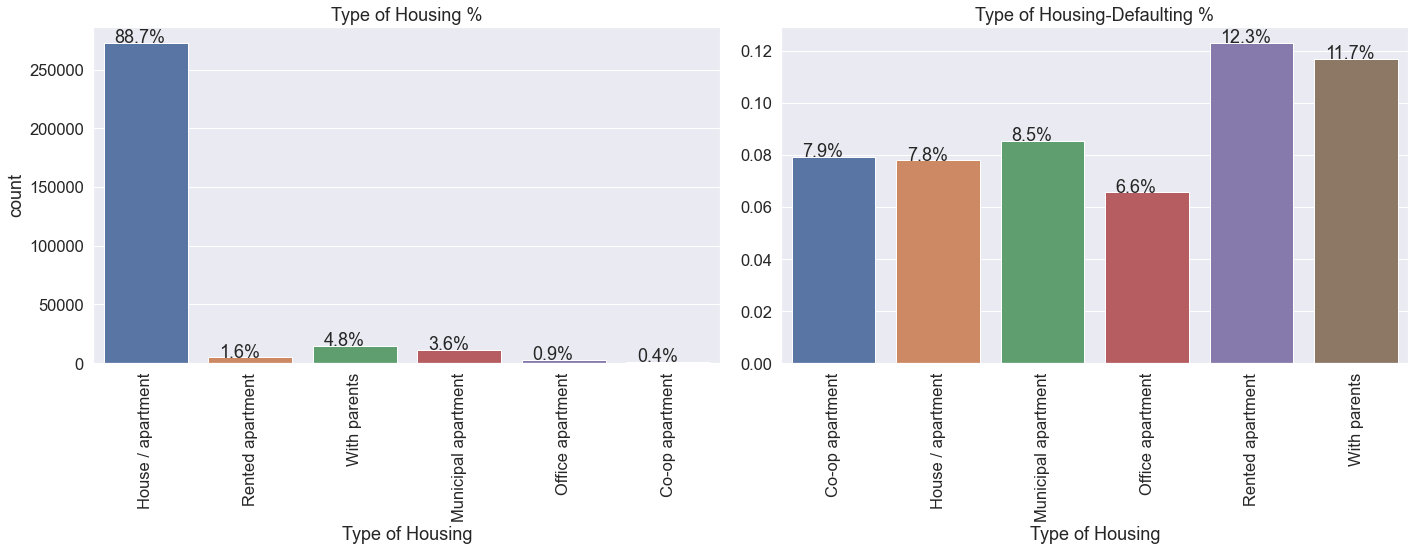

In [82]:
# comparison between the housing type and percentage of person defaulting from perticular housing.

compare_defaulting('NAME_HOUSING_TYPE', 'Type of Housing')

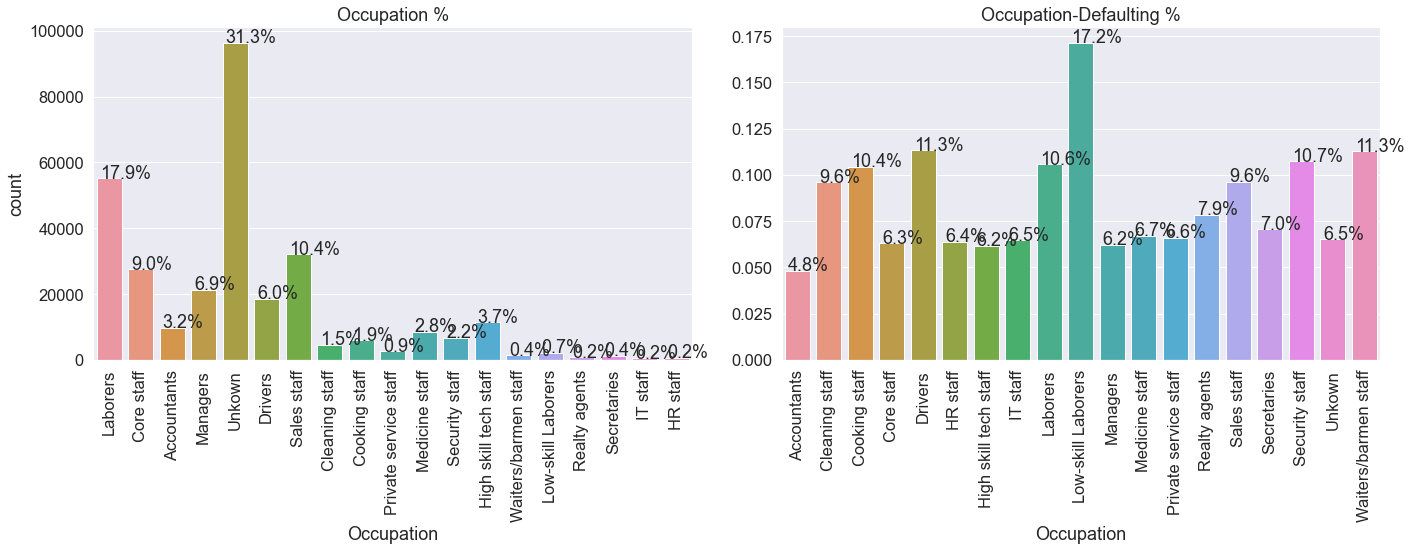

In [83]:
# comparison between the occupation type and percentage of person defaulting from perticular occupation.

compare_defaulting('OCCUPATION_TYPE', 'Occupation')

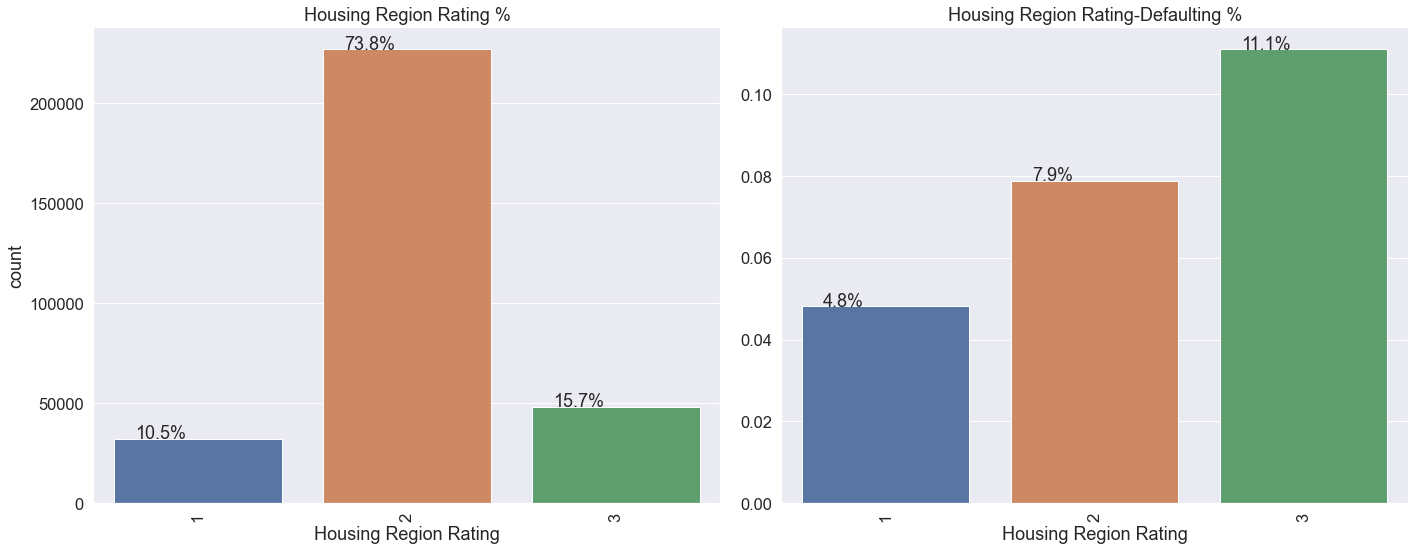

In [84]:

compare_defaulting('REGION_RATING_CLIENT','Housing Region Rating')

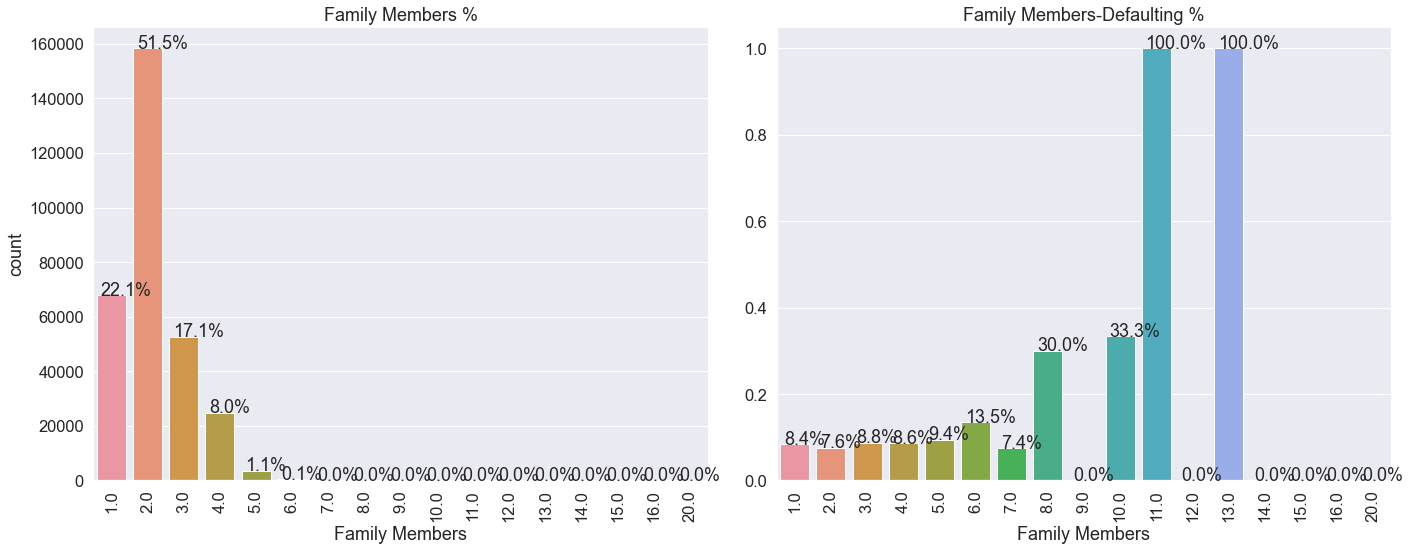

In [85]:
compare_defaulting('CNT_FAM_MEMBERS','Family Members')

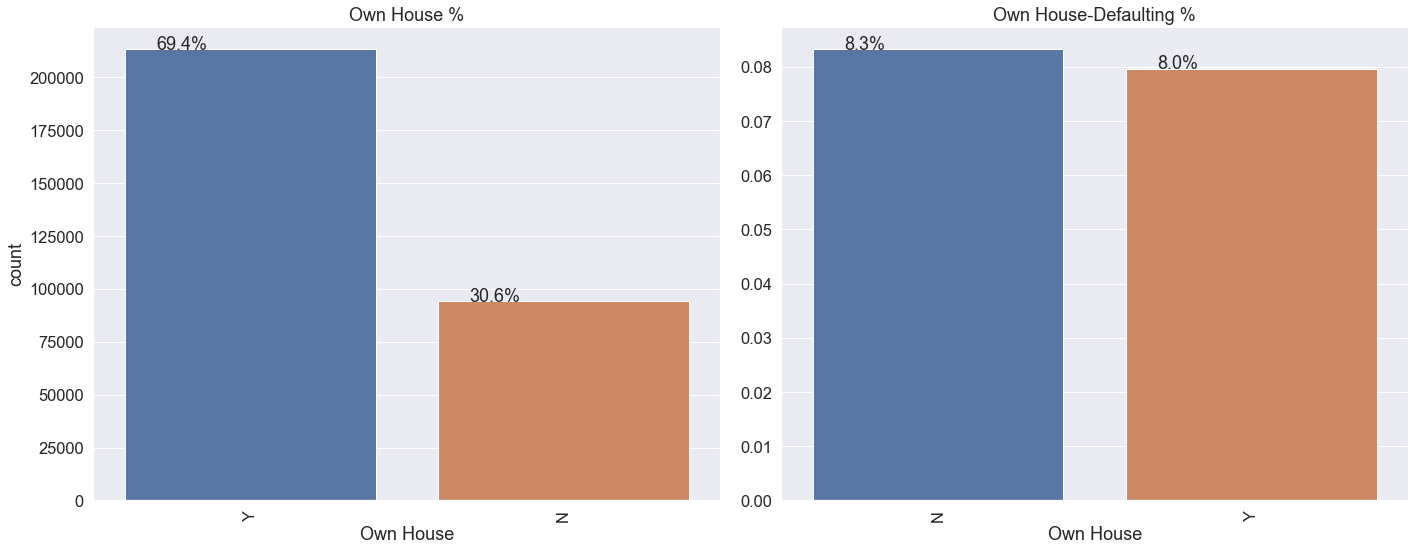

In [86]:
# checking percenatge of defaulting from 'FLAG_OWN_REALTY' for each column.'s category'.

compare_defaulting('FLAG_OWN_REALTY','Own House')

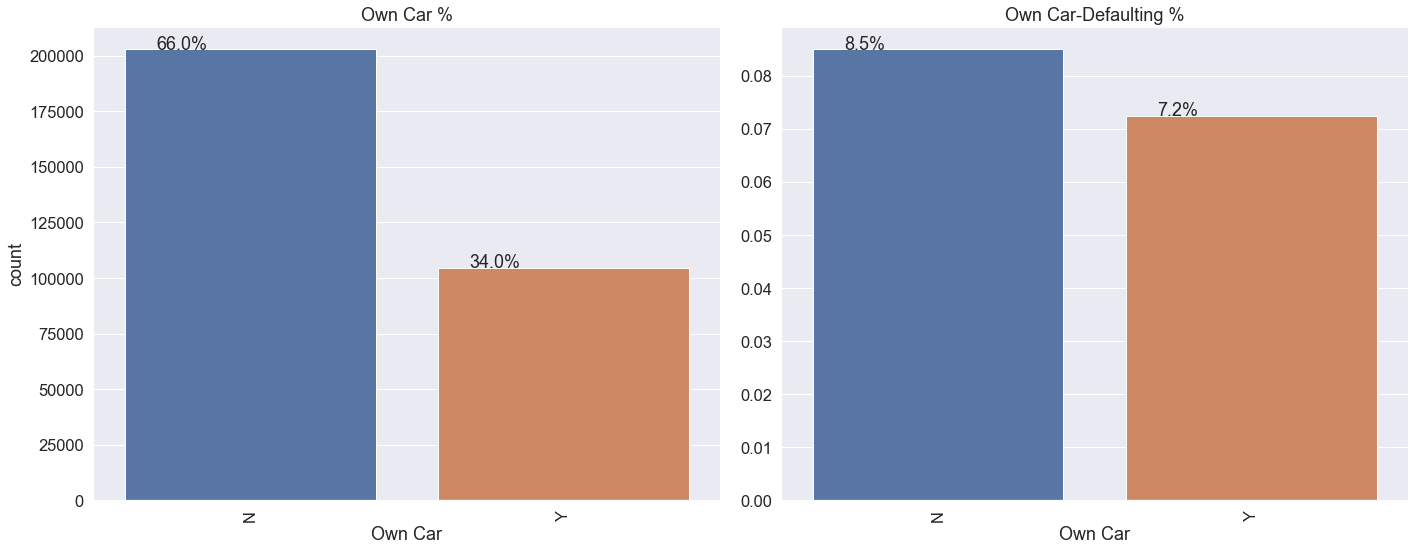

In [87]:
# checking percenatge of defaulting from 'FLAG_OWN_CAR' for each column.'s category'.

compare_defaulting('FLAG_OWN_CAR','Own Car')

# Multivariate Analysis

### In this we will be checking the people with different feature and checking the chances of defaulting the loan for those features when grouped togather
- creating the pivot table for defferant features for TARGET as values
- plotting the heatmap for easy understanding most impacting features
- draw the inferences, when they are grouped togather

In [88]:
# creating pivot table for NAME_INCOME_TYPE, DAYS_BIRTH_grp, TARGET 
#filling the null values created during the operation with 0 

income_age = pd.pivot_table(data=app_data, index='NAME_INCOME_TYPE', columns='DAYS_BIRTH_grp',values='TARGET')
income_age.fillna(0,inplace=True)
income_age

DAYS_BIRTH_grp             <30     30-40     40-50     50-60       60+
NAME_INCOME_TYPE                                                      
Businessman           0.000000  0.000000  0.000000  0.000000  0.000000
Commercial associate  0.096220  0.078136  0.065818  0.057936  0.047032
Maternity leave       0.000000  0.666667  0.000000  0.000000  0.000000
Pensioner             0.137725  0.111111  0.080180  0.053389  0.050195
State servant         0.084307  0.061102  0.049864  0.040042  0.029060
Student               0.000000  0.000000  0.000000  0.000000  0.000000
Unemployed            0.250000  0.400000  0.285714  0.000000  0.750000
Working               0.125786  0.103474  0.083135  0.069328  0.044248

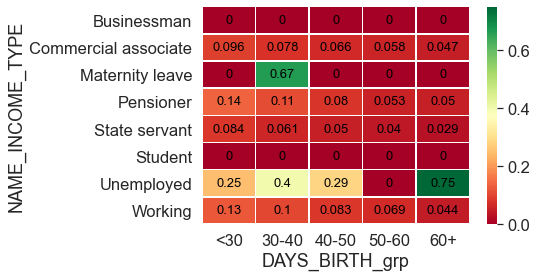

In [89]:
# heatmap for above pivit table for easy undestanding the effect.

sns.heatmap(income_age,annot=True,cmap='RdYlGn',annot_kws={'size':13,'color':'black'},
                                                                        linewidths=0.5, linecolor='white')
plt.show()

#### Insights
- The Unemployed are more likely to default the loan for all the age groups
- The maternity leaves also more likely to default the loan

In [90]:
# creating pivot table for NAME_INCOME_TYPE, AMT_CREDIT_grp, TARGET
#filling the null values created during the operation with 0 

income_credit = pd.pivot_table(data=app_data,columns='AMT_CREDIT_grp',index='AMT_INCOME_TOTAL_grp',values='TARGET')
income_credit.fillna(0,inplace=True)
income_credit

AMT_CREDIT_grp          0-100k  100k-200k  200k-300k  300K-400K  400k-500k  \
AMT_INCOME_TOTAL_grp                                                         
0-50k                 0.059233   0.062888   0.071369   0.126521   0.085409   
50k-100k              0.046265   0.068852   0.080274   0.106710   0.108905   
100k-150k             0.060277   0.078611   0.080574   0.101160   0.103634   
150k-200k             0.061682   0.070322   0.078112   0.096554   0.099987   
200K-300K             0.091241   0.064199   0.076622   0.089957   0.091557   
300k-400k             0.057143   0.060000   0.054422   0.072881   0.064092   
400k-1M               0.222222   0.093220   0.080000   0.095477   0.083333   
1M+                   0.000000   0.000000   0.000000   0.142857   0.090909   

AMT_CREDIT_grp        500k-750k   750K-1M   1M-1.5M   1.5M-2M    2M-2.5  \
AMT_INCOME_TOTAL_grp                                                      
0-50k                  0.092308  0.061856  0.092593  0.500000  0.500000   
50k-100k               0.088006  0.082586  0.065581  0.071429  0.200000   
100k-150k              0.097102  0.075765  0.068367  0.046891  0.018519   
150k-200k              0.102324  0.073636  0.068258  0.059332  0.029412   
200K-300K              0.092974  0.070249  0.058984  0.043391  0.034884   
300k-400k              0.076389  0.062522  0.054692  0.042437  0.027248   
400k-1M                0.080877  0.045993  0.049785  0.040956  0.029412   
1M+                    0.088235  0.078431  0.042254  0.000000  0.000000   

AMT_CREDIT_grp            2.5+  
AMT_INCOME_TOTAL_grp            
0-50k                 0.000000  
50k-100k              0.000000  
100k-150k             0.000000  
150k-200k             0.037037  
200K-300K             0.034188  
300k-400k             0.039474  
400k-1M               0.040000  
1M+                   0.125000

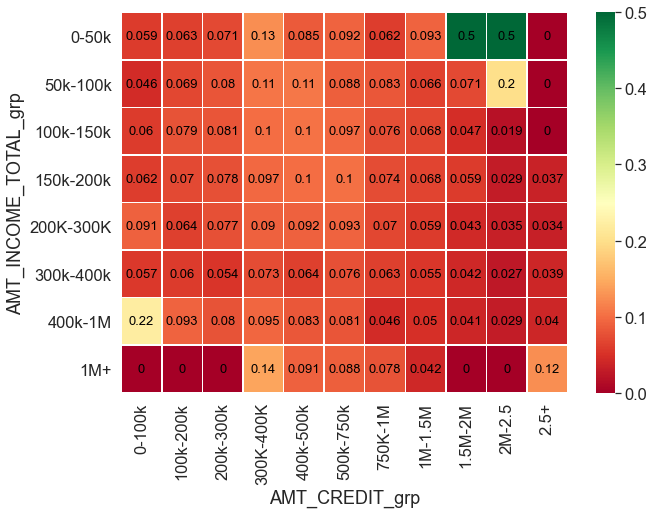

In [91]:
# heatmap for above pivit table for easy undestanding the effect.

plt.figure(figsize=(10,7))
sns.heatmap(income_credit,annot=True, cmap='RdYlGn',annot_kws={'size':13,'color':'black'},
                                                                        linewidths=0.5, linecolor='white')
plt.show()

#### Insights:
- there are some low income(0-50k) people who has takes very high loan(1.5M-2.5M) and unable to repay
- there are also high income borrower with high income(400k-1M) are anable to pay very low income(0-100k)

In [92]:
# creating pivot table for OCCUPATION_TYPE, AMT_CREDIT_grp, TARGET
#filling the null values created during the operation with 0 

credit_occu = pd.pivot_table(data=app_data,columns='AMT_CREDIT_grp',index='OCCUPATION_TYPE',values='TARGET')
credit_occu.fillna(0,inplace=True)
credit_occu

AMT_CREDIT_grp           0-100k  100k-200k  200k-300k  300K-400K  400k-500k  \
OCCUPATION_TYPE                                                               
Accountants            0.008403   0.039939   0.045790   0.052774   0.061148   
Cleaning staff         0.080000   0.086142   0.097297   0.129870   0.105485   
Cooking staff          0.040000   0.104816   0.107934   0.124573   0.128205   
Core staff             0.045361   0.059402   0.059720   0.072917   0.072831   
Drivers                0.071429   0.097362   0.111812   0.143041   0.130140   
HR staff               0.250000   0.042553   0.074074   0.090909   0.100000   
High skill tech staff  0.034286   0.067951   0.057051   0.073648   0.074136   
IT staff               0.000000   0.000000   0.087912   0.025000   0.075758   
Laborers               0.073801   0.090029   0.106304   0.127194   0.131378   
Low-skill Laborers     0.079365   0.153605   0.175115   0.193309   0.252101   
Managers               0.084507   0.056312   0.064671   0.066720   0.075269   
Medicine staff         0.037975   0.057176   0.071886   0.095816   0.075255   
Private service staff  0.039216   0.078947   0.057644   0.077586   0.082540   
Realty agents          0.000000   0.063492   0.071429   0.057692   0.116883   
Sales staff            0.074468   0.082607   0.094694   0.104027   0.118432   
Secretaries            0.047619   0.053030   0.072115   0.090278   0.071895   
Security staff         0.064935   0.084211   0.112097   0.158228   0.129577   
Unkown                 0.043693   0.055348   0.059163   0.079879   0.077814   
Waiters/barmen staff   0.090909   0.073733   0.120000   0.177778   0.150000   

AMT_CREDIT_grp         500k-750k   750K-1M   1M-1.5M   1.5M-2M    2M-2.5  \
OCCUPATION_TYPE                                                            
Accountants             0.056691  0.049007  0.046840  0.018036  0.024390   
Cleaning staff          0.107438  0.081301  0.059701  0.023256  0.000000   
Cooking staff           0.113821  0.091377  0.072027  0.035714  0.000000   
Core staff              0.080700  0.053598  0.051187  0.044132  0.009615   
Drivers                 0.141117  0.096368  0.080684  0.054902  0.086957   
HR staff                0.051282  0.027027  0.047059  0.064516  0.222222   
High skill tech staff   0.072869  0.052920  0.049883  0.034884  0.060241   
IT staff                0.148515  0.037037  0.012821  0.043478  0.000000   
Laborers                0.123673  0.089778  0.078935  0.059932  0.042945   
Low-skill Laborers      0.181176  0.116751  0.115942  0.100000  0.000000   
Managers                0.077128  0.059047  0.048780  0.045234  0.032345   
Medicine staff          0.085470  0.049257  0.044482  0.043668  0.028571   
Private service staff   0.066550  0.061453  0.057743  0.048544  0.000000   
Realty agents           0.130682  0.034483  0.058333  0.043478  0.000000   
Sales staff             0.111014  0.084666  0.081963  0.053834  0.084211   
Secretaries             0.086066  0.055556  0.054545  0.111111  0.000000   
Security staff          0.109442  0.108995  0.071904  0.062500  0.000000   
Unkown                  0.073320  0.067193  0.056799  0.046448  0.013043   
Waiters/barmen staff    0.096386  0.114094  0.089286  0.062500  0.000000   

AMT_CREDIT_grp             2.5+  
OCCUPATION_TYPE                  
Accountants            0.040000  
Cleaning staff         0.000000  
Cooking staff          0.333333  
Core staff             0.000000  
Drivers                0.000000  
HR staff               0.000000  
High skill tech staff  0.066667  
IT staff               0.250000  
Laborers               0.107143  
Low-skill Laborers     0.000000  
Managers               0.032787  
Medicine staff         0.000000  
Private service staff  0.500000  
Realty agents          0.000000  
Sales staff            0.062500  
Secretaries            0.000000  
Security staff         0.000000  
Unkown                 0.013889  
Waiters/barmen staff   0.000000

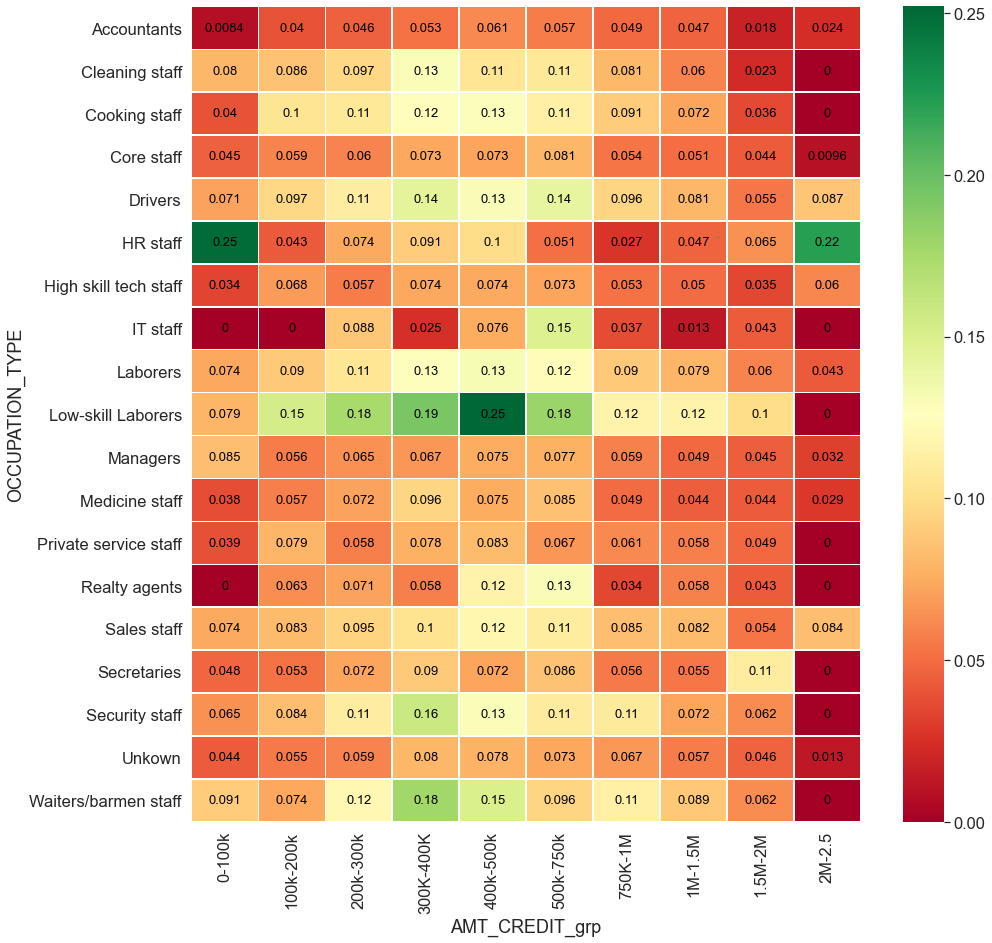

In [93]:
# heatmap for above pivit table for easy undestanding the effect.

plt.figure(figsize=(15,15))
sns.heatmap(credit_occu.loc[:,'0-100k':'2M-2.5'],annot=True,cmap='RdYlGn',annot_kws={'size':13,'color':'black'},
                                                                        linewidths=0.5, linecolor='white')
plt.show()

#### Insights:
- Low Skilled labours are more likely to default the loan except for very low loan(0-100k)
- some more defaulters are Waiter/barmen staff, security staff, laborers, HR Staff and cookind staff aswell  

In [94]:
# creating pivot table for DAYS_BIRTH, OCCUPATION_TYPE, TARGET' NAME_FAMILY_STATUS'
#filling the null values created during the operation with 0 CNT_CHILDREN_grp')

age_occu = pd.pivot_table(data=app_data,index='NAME_FAMILY_STATUS',columns ='OCCUPATION_TYPE',values='TARGET')
age_occu.fillna(0, inplace=True)
age_occu

OCCUPATION_TYPE       Accountants  Cleaning staff  Cooking staff  Core staff  \
NAME_FAMILY_STATUS                                                             
Civil marriage           0.039370        0.102612       0.120397    0.077809   
Married                  0.046744        0.096250       0.097944    0.058064   
Separated                0.053352        0.078652       0.084135    0.057576   
Single / not married     0.058704        0.122066       0.144550    0.080491   
Unknown                  0.000000        0.000000       0.000000    0.000000   
Widow                    0.044521        0.067265       0.059859    0.038880   

OCCUPATION_TYPE        Drivers  HR staff  High skill tech staff  IT staff  \
NAME_FAMILY_STATUS                                                          
Civil marriage        0.146597  0.136364               0.079108  0.095238   
Married               0.101009  0.046832               0.057012  0.069536   
Separated             0.145655  0.065217               0.061252  0.000000   
Single / not married  0.147986  0.066667               0.072008  0.060000   
Unknown               0.000000  0.000000               0.000000  0.000000   
Widow                 0.153153  0.200000               0.048327  0.000000   

OCCUPATION_TYPE       Laborers  Low-skill Laborers  Managers  Medicine staff  \
NAME_FAMILY_STATUS                                                             
Civil marriage        0.129185            0.161094  0.076744        0.097387   
Married               0.096642            0.165426  0.057754        0.063981   
Separated             0.109462            0.164835  0.068750        0.060514   
Single / not married  0.132301            0.204545  0.077488        0.073257   
Unknown               0.000000            0.000000  0.000000        0.000000   
Widow                 0.069250            0.041667  0.043290        0.038554   

OCCUPATION_TYPE       Private service staff  Realty agents  Sales staff  \
NAME_FAMILY_STATUS                                                        
Civil marriage                     0.076159       0.025316     0.103650   
Married                            0.059642       0.081498     0.093878   
Separated                          0.105263       0.115385     0.097902   
Single / not married               0.061896       0.093960     0.101770   
Unknown                            0.000000       0.000000     0.000000   
Widow                              0.034483       0.000000     0.077991   

OCCUPATION_TYPE       Secretaries  Security staff    Unkown  \
NAME_FAMILY_STATUS                                            
Civil marriage           0.086957        0.124665  0.080831   
Married                  0.078292        0.096394  0.061559   
Separated                0.000000        0.118834  0.068443   
Single / not married     0.059633        0.140472  0.077041   
Unknown                  0.000000        0.000000  0.000000   
Widow                    0.038462        0.086486  0.056668   

OCCUPATION_TYPE       Waiters/barmen staff  
NAME_FAMILY_STATUS                          
Civil marriage                    0.081633  
Married                           0.122511  
Separated                         0.070000  
Single / not married              0.131653  
Unknown                           0.000000  
Widow                             0.047619

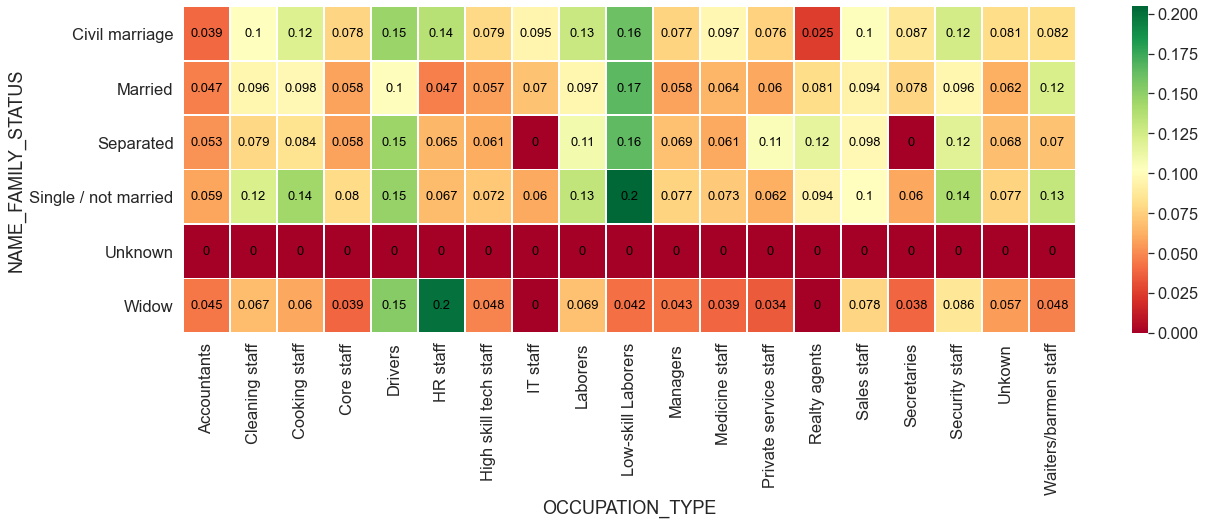

In [95]:
plt.figure(figsize=(20,6))
sns.heatmap(age_occu,annot=True,cmap='RdYlGn',annot_kws={'size':13,'color':'black'},
                                                                        linewidths=0.5, linecolor='white')
plt.show()

#### Insights
- Single/Not married and Civil marriage are more likely to default only for occupations: Low-Skill Labours, Drivers labours, Security Staff

##  Reading the Previous Application  Data
'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer


In [96]:
# reading the previous data

pre_data = pd.read_csv('previous_application.csv')
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [97]:
# checking the number of rows and columns in dataset

pre_data.shape

(1670214, 37)

In [98]:
# checking the info() of the dataset

pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [99]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            1.0                9.0   
1                    0.003541          45            3.0                3.0   
2                    0.010032          52            0.0               11.0   
3                    0.008019          52            8.0               26.0   
4                    0.028663          54            8.0               11.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                5        Laborers              1.0                     2   
1                0      Core staff              2.0                     1   
2                6        Laborers              1.0                     2   
3                6        Laborers              2.0                     2   
4                9      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [100]:
# statistical summary of the numerical columns in the previous data

pre_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [101]:
pre_data.describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
count                     1670214             1.670214e+06   
unique                          7                      NaN   
top                       TUESDAY                      NaN   
freq                       255118                      NaN   
mean                          NaN             1.248418e+01   
std                           NaN             3.334028e+00   
min                           NaN             0.000000e+00   
25%                           NaN             1.000000e+01   
50%                           NaN             1.200000e+01   
75%                           NaN             1.500000e+01   
max                           NaN             2.300000e+01   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count                      1670214            1.670214e+06      774370.000000   
unique                           2                     NaN                NaN   
top                              Y                     NaN                NaN   
freq                       1661739                     NaN                NaN   
mean                           NaN            9.964675e-01           0.079637   
std                            NaN            5.932963e-02           0.107823   
min                            NaN            0.000000e+00          -0.000015   
25%                            NaN            1.000000e+00           0.000000   
50%                            NaN            1.000000e+00           0.051605   
75%                            NaN            1.000000e+00           0.108909   
max                            NaN            1.000000e+00           1.000000   

        RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
count             5951.000000               5951.000000   
unique                    NaN                       NaN   
top                       NaN                       NaN   
freq                      NaN                       NaN   
mean                 0.188357                  0.773503   
std                  0.087671                  0.100879   
min                  0.034781                  0.373150   
25%                  0.160716                  0.71564

In [102]:
# merging the application data and previous data

merged_data = pd.merge(app_data, pre_data,how='inner',on='SK_ID_CURR')
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            1.0                9.0   
1                    0.003541          45            3.0                3.0   
2                    0.003541          45            3.0                3.0   
3                    0.003541          45            3.0                3.0   
4                    0.010032          52            0.0               11.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                5        Laborers              1.0                     2   
1                0      Core staff              2.0                     1   
2                0      Core staff              2.0                     1   
3                0      Core staff              2.0                     1   
4                6        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                         11                           0   
3                         11                           0   
4                          9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0         

In [103]:
# checking the number of rows and column inside the meged data

merged_data.shape

(1413701, 81)

In [104]:
# satistical summary of the numerical columns

merged_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+05   2.701702e+04       5.277186e+05   
std    3.849173e+05   1.395116e+04       3.532465e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  4.421384e+01   5.801530e+00   
std                  1.334702e-02  1.190217e+01   5.770721e+00   
min                  2.900000e-04  2.000000e+01   0.000000e+00   
25%                  1.003200e-02  3.400000e+01   2.000000e+00   
50%                  1.885000e-02  4.300000e+01   4.000000e+00   
75%                  2.866300e-02  5.400000e+01   7.000000e+00   
max                  7.250800e-02  6.900000e+01   4.900000e+01   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       1.413701e+06     1.413701e+06     1.413701e+06   
mean        1.321683e+01     7.823753e+00     2.150501e+00   
std         9.725399e+00     4.129233e+00     9.006787e-01   
min         0.000000e+00     0.000000e+00     1.000000e+00   
25%         5.000000e+00     4.000000e+00     2.000000e+00   
50%         1.200000e+01     9.000000e+00     2.000000e+00   
75%         2.000000e+01     1.100000e+01     3.000000e+00   
max         6.700000e+01     1.900000e+01     2.000000e+01   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          1.413701e+06                 1.413701e+06   
mean           2.059638e+00                 2.037603e+00   
std            4.957797e-01                 4.886431e-01   
min            1.000000e+00                 1.000000e+00   
25%            2.000000e+00                 2.000000e+00   
50%            2.000000e+00                 2.000000e+00   
75%            2.000000e+00                 2.000000e+00   
max            3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count               1.413701e+06                1.413701e+06   
mean                1.198433e+01                1.207327e-02   
std                 3.232181e+00                1.092132e-01   
min                 0.000000e+00                0.000000e+00   
25%                 1.000000e+01                0.000000e+00   
50%                 1.200000e+01                0.000000e+00   
75%                 1.400000e+01                0.000000e+00   
max                 2.300000e+01                1.000000e+00   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                1.413701e+06                 1.413701e+06   
mean                 4.396686e-02                 3.604793e-02   
std                  2.050215e-01                 1.864095e-01   
min                  0.000000e+00                 0.000000e+00   
25%                  0.000000e+00                 0.000000e+00   
50%                  0.000000e+00                 0.000000e+00   
75%                  0.000000e+00                 0.000000e+00   
max                  1.000000e+00                 1.000000e+00   

      

In [105]:
# info of the columns

merged_data.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 81 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  object  
 5   FLAG_OWN_REALTY               1413701 non-null  object  
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x             1410175 non-null  object  
 12  NAME_INCOME_TY

In [106]:
# percentage of null values in merged_data dataset

(merged_data.isnull().mean()* 100).sort_values()

SK_ID_CURR                       0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
DAYS_LAST_PHONE_CHANGE           0.000000
DAYS_BIRTH_grp                   0.000000
AMT_INCOME_TOTAL_grp             0.000000
AMT_CREDIT_grp                   0.000000
CNT_CHILDREN_grp                 0.000000
SK_ID_PREV                       0.000000
NAME_CONTRACT_TYPE_y             0.000000
AMT_APPLICATION                  0.000000
WEEKDAY_APPR_PROCESS_START_y     0.000000
HOUR_APPR_PROCESS_START_y        0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0.000000
NAME_PRODUCT_TYPE                0

In [107]:
# function for plotting countplot 

def merged_count_percentage(column):
    
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=column, data=merged_data)
    plt.title(column +' %')
    plt.xticks(rotation=90)
    plt.xlabel(column)
          
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/merged_data.shape[0]*100)), (p.get_x()+0.1,(p.get_height()+50)))

In [108]:
merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True) * 100

XAP                                 55.665024
XNA                                 40.132319
Repairs                              1.423002
Other                                0.950130
Urgent needs                         0.511848
Buying a used car                    0.174648
Building a house or an annex         0.165806
Everyday expenses                    0.145151
Medicine                             0.132348
Payments on other loans              0.111268
Education                            0.094362
Journey                              0.073707
Purchase of electronic equipment     0.066068
Buying a new car                     0.062672
Wedding / gift / holiday             0.056660
Buying a home                        0.049586
Car repairs                          0.048879
Furniture                            0.046686
Buying a holiday home / land         0.032751
Business development                 0.025394
Gasification / water supply          0.017755
Buying a garage                   

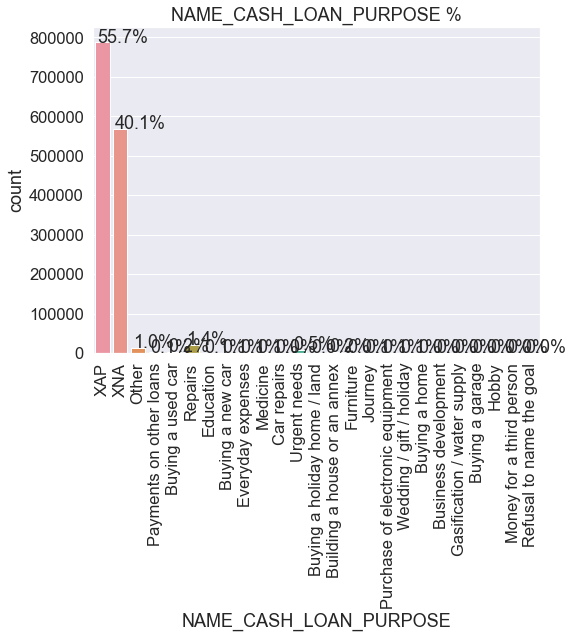

In [109]:
#countplot for 'NAME_CASH_LOAN_PURPOSE'

merged_count_percentage('NAME_CASH_LOAN_PURPOSE')

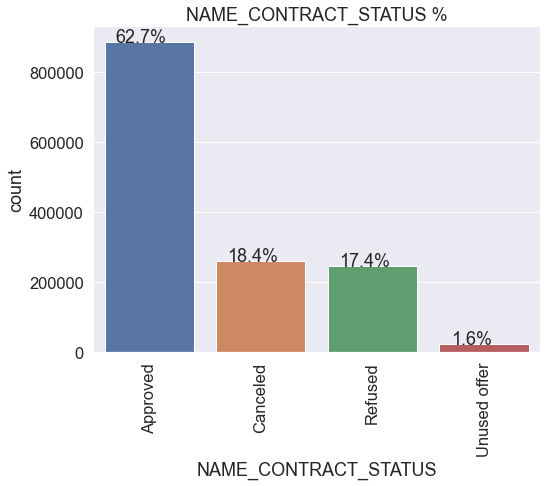

In [110]:
# countplot with percentage of each categories for column 'NAME_CONTRACT_STATUS'

merged_count_percentage('NAME_CONTRACT_STATUS')

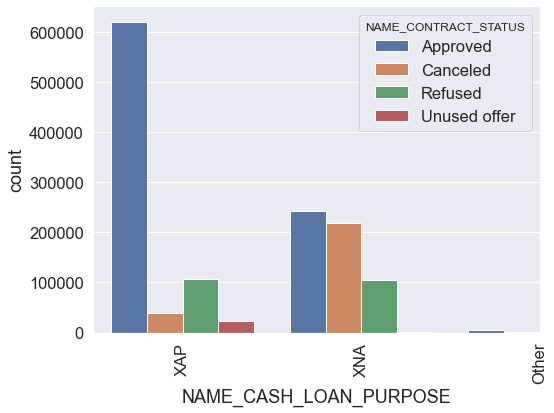

In [111]:
# countplot for 'NAME_CASH_LOAN_PURPOSE' and 'NAME_CONTRACT_STATUS'

plt.figure(figsize=(8,6))

sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=merged_data,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.xlim(right=2)
plt.show()



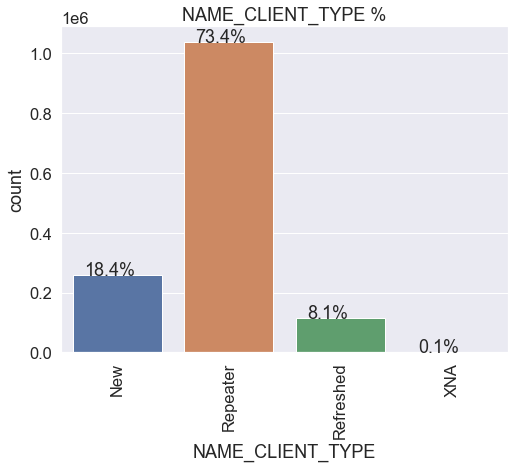

In [112]:
# countplot with percentage of each categories for column 'NAME_CONTRACT_STATUS'

merged_count_percentage('NAME_CLIENT_TYPE')

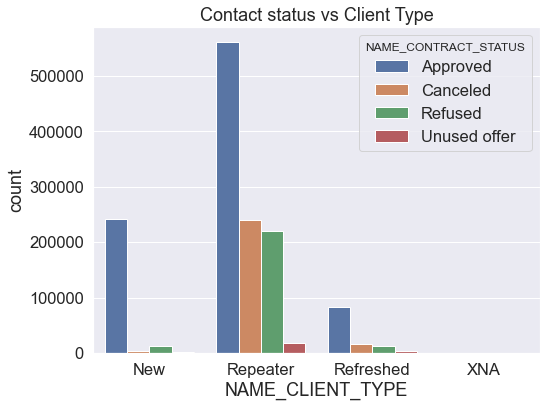

In [113]:
# countplot for 'NAME_CLIENT_TYPE' with hue 'NAME_CONTRACT_STATUS' column

plt.figure(figsize=(8,6))
ax = sns.countplot(x='NAME_CLIENT_TYPE', data=merged_data, hue='NAME_CONTRACT_STATUS')
plt.title('Contact status vs Client Type')
plt.show()

In [114]:
# creating pivot table for 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', TARGET
#filling the null values created during the operation with 0 

contact_pupose = pd.pivot_table(data=merged_data,columns='NAME_CASH_LOAN_PURPOSE',index='NAME_CLIENT_TYPE',values='TARGET')
contact_pupose.fillna(0,inplace=True)
contact_pupose

NAME_CASH_LOAN_PURPOSE  Building a house or an annex  Business development  \
NAME_CLIENT_TYPE                                                             
New                                         0.142857              0.075472   
Refreshed                                   0.115702              0.090909   
Repeater                                    0.139382              0.141343   
XNA                                         0.000000              0.000000   

NAME_CASH_LOAN_PURPOSE  Buying a garage  Buying a holiday home / land  \
NAME_CLIENT_TYPE                                                        
New                                0.25                      0.132075   
Refreshed                          0.00                      0.058824   
Repeater                           0.04                      0.119593   
XNA                                0.00                      0.000000   

NAME_CASH_LOAN_PURPOSE  Buying a home  Buying a new car  Buying a used car  \
NAME_CLIENT_TYPE                                                             
New                          0.063492          0.128571           0.106464   
Refreshed                    0.040000          0.107692           0.054878   
Repeater                     0.133106          0.085561           0.137880   
XNA                          0.000000          0.000000           0.000000   

NAME_CASH_LOAN_PURPOSE  Car repairs  Education  Everyday expenses  Furniture  \
NAME_CLIENT_TYPE                                                               
New                        0.216667   0.118721           0.084034   0.093750   
Refreshed                  0.307692   0.150943           0.113924   0.095238   
Repeater                   0.170642   0.099906           0.109530   0.138943   
XNA                        0.000000   0.000000           0.000000   0.000000   

NAME_CASH_LOAN_PURPOSE  Gasification / water supply     Hobby   Journey  \
NAME_CLIENT_TYPE                                                          
New                                        0.120000  0.333333  0.094340   
Refreshed                                  0.357143  0.000000  0.023256   
Repeater                                   0.181818  0.200000  0.113230   
XNA                                        0.000000  0.000000  0.000000   

NAME_CASH_LOAN_PURPOSE  Medicine  Money for a third person     Other  \
NAME_CLIENT_TYPE                                                       
New                     0.147139                       0.0  0.116833   
Refreshed               0.086957                       0.0  0.125397   
Repeater                0.133101                       0.2  0.125830   
XNA                     0.000000                       0.0  0.000000   

NAME_CASH_LOAN_PURPOSE  Payments on other loans  \
NAME_CLIENT_TYPE                                  
New                                    0.083333   
Refreshed                              0.055556   
Repeater                               0.164777   
XNA                                    0.000000   

NAME_CASH_LOAN_PURPOSE  Purchase of electronic equipment  \
NAME_CLIENT_TYPE                                           
New                                             0.118483   
Refreshed                                       0.065217   
Repeater                                        0.131462   
XNA                                             0.000000   

NAME_CASH_LOAN_PURPOSE  Refusal to name the goal   Repairs  Urgent needs  \
NAME_CLIENT_TYPE                                                           
New                                     0.666667  0.134774      0.136433   
Refreshed                               0.000000  0.116766      0.109467   
Repeater                                0.111111  0.129989      0.154935   
XNA                                     0.000000  0.153846      0.333333   

NAME_CASH_LOAN_PURPOSE  Wedding / gift / holiday       XAP       XNA  
NAME_CLIENT_TYPE                                              

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

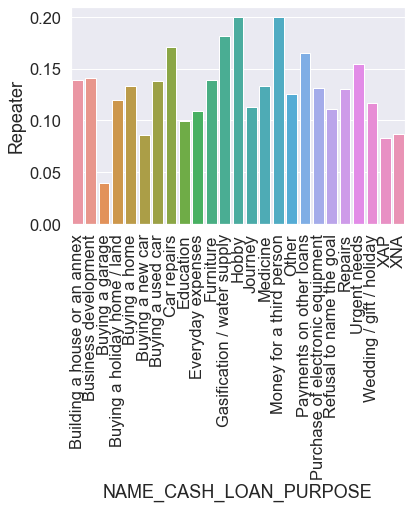

In [127]:
sns.barplot(contact_pupose.T.index,contact_pupose.T.Repeater)
plt.xticks(rotation=90)

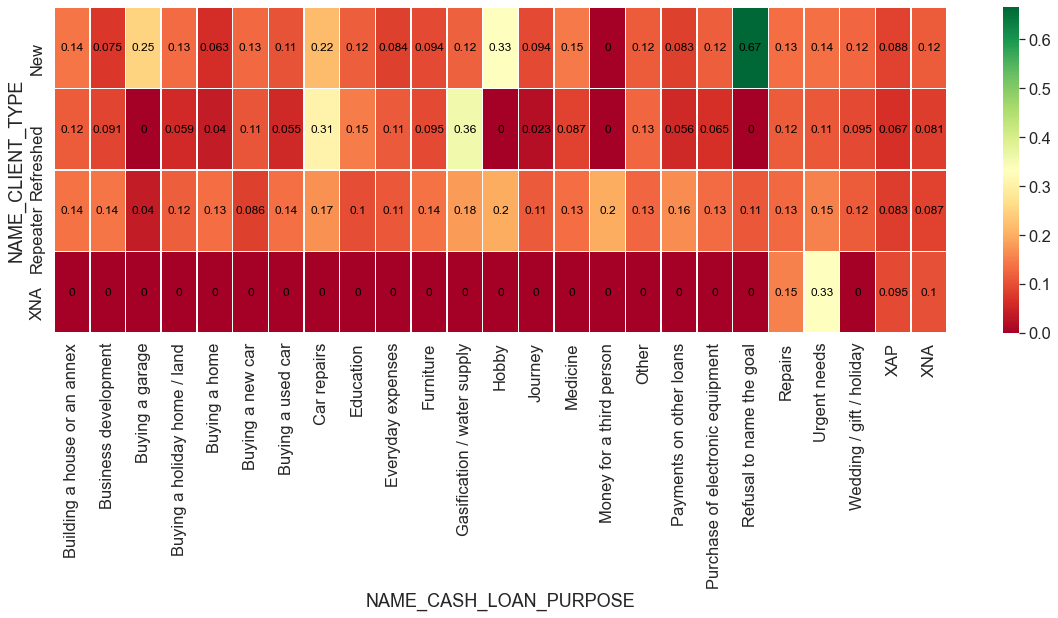

In [115]:
# heatmap for above pivit table for easy undestanding the effect.

plt.figure(figsize=(20,6))

sns.heatmap(contact_pupose, annot=True, cmap='RdYlGn',annot_kws={'size':12,'color':'black'},
                                    linewidths=0.5, linecolor='white')
plt.show()

## Conclusion :
- CODE_GENDER: Men are at relatively higher default rate
- NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
- NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
- NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
- REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
- OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
- ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
- DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
- DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
- CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
- AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.
- 'NAME_CLIENT_TYPE':repeaters applying for loan are more, Chances of repeaters loans getting approved is more.
- NAME_CLIENT_TYPE : New borrowers are more likely to default
